## Final Project Submission

Please fill out:
* Student name: Greg Osborne
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

This is not the final product yet. I'm using this notebook to 
begin evaluating the available data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import shutil
import sqlite3
import seaborn as sns
import matplotlib.patches as mpatches

In [3]:
pd.set_option("display.max_columns", None)

#A command I was using earlier that I may use again.
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
ls zippedData

 Volume in drive C is OS
 Volume Serial Number is 4EE7-277F

 Directory of C:\Users\g_osb\dsc-phase-1-project-v2-4\zippedData

05/19/2022  01:15 PM    <DIR>          .
05/20/2022  09:32 AM    <DIR>          ..
05/08/2022  11:01 PM            53,544 bom.movie_gross.csv.gz
05/08/2022  11:01 PM        67,149,708 im.db.zip
05/08/2022  11:01 PM           107,563 movie_data_erd.jpeg
05/08/2022  11:01 PM           498,202 rt.movie_info.tsv.gz
05/08/2022  11:01 PM         3,402,194 rt.reviews.tsv.gz
05/08/2022  11:01 PM           827,840 tmdb.movies.csv.gz
05/08/2022  11:01 PM           153,218 tn.movie_budgets.csv.gz
               7 File(s)     72,192,269 bytes
               2 Dir(s)  414,838,538,240 bytes free


In [5]:
bom = pd.read_csv('C:/Users/g_osb/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz')
rt_info = pd.read_csv('C:/Users/g_osb/dsc-phase-1-project-v2-4/zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews = pd.read_csv('C:/Users/g_osb/dsc-phase-1-project-v2-4/zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='windows-1252')
tmdb = pd.read_csv('C:/Users/g_osb/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz')
tn = pd.read_csv('C:/Users/g_osb/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz')

Unzipping the SQL data and previewing all the tables.

In [6]:
#unzip the zip file
#C:/Users/g_osb/dsc-phase-1-project-v2-4
shutil.unpack_archive("C:/Users/g_osb/dsc-phase-1-project-v2-4/zippedData/im.db.zip")

In [7]:
#The SQL file is named im.db. Connecting it to Python
conn = sqlite3.connect('im.db')
cur = conn.cursor()

The next cell ses up printing the table names.

In [8]:
%%script sqlite3 im.db --out tables
.tables
.quit

In [9]:
#Now listing the tables
print(tables)

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      



In [10]:
#Putting each table into a dataframe
imdb_directors = pd.read_sql("""
SELECT *
FROM directors
;
""",conn)

#I checked each table for fully duplicated rows, then deleted the duplicates.
#If a table had no duplicates, I deleted the check.
imdb_directors.drop(imdb_directors[imdb_directors.duplicated()].index, inplace=True)
imdb_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [11]:
imdb_movie_akas = pd.read_sql("""
SELECT *
FROM movie_akas
;
""",conn)
imdb_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [12]:
imdb_movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
imdb_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
imdb_principals = pd.read_sql("""
SELECT *
FROM principals
;
""",conn)
imdb_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [14]:
imdb_known_for = pd.read_sql("""
SELECT *
FROM known_for
;
""",conn)
imdb_known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [15]:
imdb_movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
imdb_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [16]:
imdb_persons = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
imdb_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [17]:
imdb_writers = pd.read_sql("""
SELECT *
FROM writers
;
""",conn)
imdb_writers.drop(imdb_writers[imdb_writers.duplicated()].index, inplace=True)
imdb_writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [18]:
#Looking for a friend of mine's Uncle, Sanford Gibbons
pd.read_sql("""
SELECT *
FROM persons
WHERE primary_name LIKE '%Gibbons%';
""",conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0316584,Patrick D. Gibbons,NaN,NaN,"assistant_director,producer,miscellaneous"
1,nm0316554,Greg Gibbons,NaN,NaN,"animation_department,visual_effects,art_director"
2,nm0316596,Sanford Gibbons,1933.0,2018.0,actor
3,nm1733301,Dave Gibbons,1949.0,NaN,"writer,art_department,producer"
4,nm0316531,Billy Gibbons,1949.0,NaN,"soundtrack,actor,composer"
5,nm2524514,Matt Gibbons,NaN,NaN,"actor,writer,director"
6,nm1644817,Tyler Gibbons,NaN,NaN,"composer,sound_department,soundtrack"
7,nm3453179,Pete Gibbons,NaN,NaN,producer
8,nm1668151,Neil Gibbons,NaN,NaN,"writer,producer,director"
9,nm2971362,Tony Gibbons,1983.0,NaN,actor


In [19]:
#Here's my friend's Uncle's final film. Again, left for fun.
pd.read_sql("""
SELECT *
FROM principals
JOIN movie_basics
    USING(movie_id)
WHERE person_id LIKE 'nm0316596';
""",conn)

,movie_id,ordering,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5607782,4,nm0316596,actor,None,"[""Father James Burk""]",The Covenant,The Covenant,2017,90.0,Horror


In [20]:
#After reviewing the data, I found a strange mistake in Box Office Mojo's
#date for a 2012 movie titled Upside Down. It's date is listed 2013. This
#caused the data to be inconsistent with other databases. I could just delete
#it, but, after finding the error, it's just as easy to correct it.

bom.at[1298,'year'] = 2012
bom.iloc[1298]['year']

2012

In [21]:
#Merging bom and imdb
movies_analyzed = pd.merge(bom,imdb_movie_basics, how='inner',left_on='title', right_on='original_title')
movies_analyzed

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
2771,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,The Escape,2017,101.0,Drama
2772,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance"
2773,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance"
2774,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Souvenir,2014,86.0,Documentary


In [22]:
#Dropping mistakes based on inconsistent years released data.
movies_to_drop = movies_analyzed[movies_analyzed['title'].duplicated()]
movies_to_drop.drop(movies_to_drop[(movies_to_drop['year'] == movies_to_drop['start_year'])].index, inplace=True)
movies_analyzed.drop(movies_to_drop.index, inplace=True)
movies_analyzed.drop(movies_analyzed[(movies_analyzed['year'] != movies_analyzed['start_year'])].index, inplace=True)
bom_and_imdb = movies_analyzed.reset_index()
bom_and_imdb

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
1662,2756,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror"
1663,2761,Helicopter Eela,Eros,72000.0,NaN,2018,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama
1664,2765,Oolong Courtyard,CL,37700.0,NaN,2018,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy
1665,2768,The Workshop,Strand,22100.0,NaN,2018,tt7405478,The Workshop,The Workshop,2018,80.0,Thriller


In [23]:
#Editing tmdb so we can merge it with the other data easily
tmdb.rename(columns = {'Unnamed: 0':'tmdb_index','original_title':'tmdb_original_title','title':'tmdb_title', 'id': 'tmdb_id', 'release_date':'tmdb_release_date'},inplace=True)

#Fixing yet another error in Upside Down
tmdb.at[7969,'tmdb_release_date'] = '2012-08-31'

#Converting to release dates to release years in integers in a new column
tmdb['tmdb_year'] = tmdb['tmdb_release_date'].map(lambda x : x[0:4])
tmdb['tmdb_year'] = tmdb['tmdb_year'].astype(int)

In [24]:
#Merging the newly culled dataframe with the tmdb dataframe
movies_analyzed = pd.merge(bom_and_imdb,tmdb, how='inner',left_on='title', right_on='tmdb_title')
movies_analyzed

,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year
0,0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,2010
1,1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843,2010
3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,2010
4,4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2739,The Guardians,MBox,177000.0,NaN,2018,tt8150132,The Guardians,The Guardians,2018,70.0,Documentary,5670,"[18, 28, 53, 80]",130747,de,Schutzengel,4.795,2012-10-10,The Guardians,6.0,55,2012
1771,2742,Museo,Vita.,149000.0,NaN,2018,tt4958448,Museo,Museo,2018,128.0,"Crime,Drama",24760,"[80, 18]",477654,es,Museo,4.819,2018-09-14,Museo,6.5,37,2018
1772,2756,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror",15469,"[10751, 18, 80]",199999,en,The House That Jack Built,1.532,2015-12-11,The House That Jack Built,5.3,4,2015
1773,2756,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror",23926,"[18, 27, 80, 53]",398173,en,The House That Jack Built,17.556,2018-11-28,The House That Jack Built,7.3,752,2018


In [25]:
#Dropping mistakes based on inconsistent years released data.
movies_to_drop = movies_analyzed[movies_analyzed['title'].duplicated()]
movies_to_drop.drop(movies_to_drop[(movies_to_drop['year'] == movies_to_drop['tmdb_year'])].index, inplace=True)
movies_analyzed.drop(movies_to_drop.index, inplace=True)
movies_analyzed.drop(movies_analyzed[(movies_analyzed['year'] != movies_analyzed['tmdb_year'])].index, inplace=True)
bom_imdb_and_tmdb = movies_analyzed.reset_index()
bom_imdb_and_tmdb

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,level_0,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year
0,0,0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,2010
1,1,1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
2,2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843,2010
3,3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,2010
4,4,4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1767,2731,Time Freak,Grindstone,10000.0,256000,2018,tt6769280,Time Freak,Time Freak,2018,104.0,"Comedy,Drama,Romance",24187,"[878, 35, 10749]",451925,en,Time Freak,9.751,2018-11-09,Time Freak,6.3,97,2018
1632,1768,2732,What They Had,BST,260000.0,NaN,2018,tt6662736,What They Had,What They Had,2018,101.0,Drama,24542,[18],451919,en,What They Had,6.252,2018-10-19,What They Had,6.8,23,2018
1633,1771,2742,Museo,Vita.,149000.0,NaN,2018,tt4958448,Museo,Museo,2018,128.0,"Crime,Drama",24760,"[80, 18]",477654,es,Museo,4.819,2018-09-14,Museo,6.5,37,2018
1634,1773,2756,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror",23926,"[18, 27, 80, 53]",398173,en,The House That Jack Built,17.556,2018-11-28,The House That Jack Built,7.3,752,2018


In [26]:
#Editing tn so we can merge it with the other data easily

tn.rename(columns = {'id':'tn_id','movie':'tn_title','domestic_gross':'tn_domestic_gross', 'worldwide_gross': 'tn_worldwide_gross', 'release_date':'tn_release_date'},inplace=True)
#Fixing yet another error in Upside Down
tn.at[1203,'tn_release_date'] = 'Aug 31 2012'

#Converting date to integer year in new column
tn['tn_year'] = tn['tn_release_date'].map(lambda x : x[-4:])
tn['tn_year'] = tn['tn_year'].astype(int)

In [27]:
#Merging the newly culled dataframe with the newly formatted dataframe tn
movies_analyzed = pd.merge(bom_imdb_and_tmdb,tn, how='inner',left_on='title', right_on='tn_title')
movies_analyzed

,level_0,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year,tn_id,tn_release_date,tn_title,production_budget,tn_domestic_gross,tn_worldwide_gross,tn_year
0,0,0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522",2010
1,1,1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",2010
2,2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",2010
3,3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828",2010
4,4,4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1741,2682,Suspiria,Amazon,2500000.0,5400000,2018,tt1034415,Suspiria,Suspiria,2018,152.0,"Fantasy,Horror,Mystery",23936,"[27, 14]",361292,en,Suspiria,16.925,2018-10-26,Suspiria,7.0,752,2018,81,"Oct 26, 2018",Suspiria,"$20,000,000","$2,483,472","$7,034,615",2018
1158,1743,2686,The Hurricane Heist,ENTMP,6100000.0,NaN,2018,tt5360952,The Hurricane Heist,The Hurricane Heist,2018,103.0,"Action,Adventure,Crime",24023,"[28, 80, 53]",430040,en,The Hurricane Heist,13.335,2018-03-09,The Hurricane Heist,5.4,476,2018,22,"Mar 9, 2018",The Hurricane Heist,"$40,000,000","$6,115,824","$30,963,684",2018
1159,1745,2688,Destroyer,Annapurna,1500000.0,4000000,2018,tt7137380,Destroyer,Destroyer,2018,121.0,"Action,Crime,Drama",23921,"[53, 80, 18, 28]",471507,en,Destroyer,17.815,2018-12-25,Destroyer,5.9,176,2018,5,"Dec 25, 2018",Destroyer,"$9,000,000","$1,533,324","$3,681,096",2018
1160,1749,2694,Gotti,VE,4300000.0,NaN,2018,tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100",2018


In [28]:
#Dropping mistakes based on inconsistent years released data.
movies_to_drop = movies_analyzed[movies_analyzed['title'].duplicated()]
movies_to_drop.drop(movies_to_drop[(movies_to_drop['year'] == movies_to_drop['tn_year'])].index, inplace=True)
movies_analyzed.drop(movies_to_drop.index, inplace=True)
movies_analyzed.drop(movies_analyzed[(movies_analyzed['year'] != movies_analyzed['tn_year'])].index, inplace=True)

C:\Users\g_osb\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
#There are duplicate rows I need to drop. These are rows with the same film
#title and same release year. To do this, I need to create a dataframe with
#just these values, and preserve the index numbers from the dataframe created
#which is called bom_imdb_tmdb_and_tn

pd.set_option("display.max_rows", None, "display.max_columns", None)

duplicated_titles = movies_analyzed[movies_analyzed['movie_id'].duplicated(keep=False)].sort_values('title')
duplicated_titles = duplicated_titles.iloc[:,1:].reset_index()
duplicated_titles['duped_title'] = duplicated_titles['movie_id'].duplicated()
duplicated_titles['duped_year'] = duplicated_titles['year'].duplicated().astype(bool)
duplicated_titles['drop'] = False

#I couldn't figure out how to do this using a lambda function.
for x in range(len(duplicated_titles)):
    if (duplicated_titles['duped_title'][x] == True and duplicated_titles['duped_year'][x] == True):
        duplicated_titles['drop'][x] = True
    

duplicated_titles

<ipython-input-29-f3b11eaa361f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_titles['drop'][x] = True


,level_0,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year,tn_id,tn_release_date,tn_title,production_budget,tn_domestic_gross,tn_worldwide_gross,tn_year,duped_title,duped_year,drop
0,1014,2305,A Bad Moms Christmas,STX,72100000.0,58400000,2017,tt6359956,A Bad Moms Christmas,A Bad Moms Christmas,2017,104.0,"Adventure,Comedy",20684,[35],431530,en,A Bad Moms Christmas,16.604,2017-11-01,A Bad Moms Christmas,6.3,1044,2017,40,"Nov 1, 2017",A Bad Moms Christmas,"$28,000,000","$72,110,659","$127,710,550",2017,False,False,False
1,1015,2305,A Bad Moms Christmas,STX,72100000.0,58400000,2017,tt6359956,A Bad Moms Christmas,A Bad Moms Christmas,2017,104.0,"Adventure,Comedy",23944,[35],431530,en,A Bad Moms Christmas,16.604,2017-11-01,A Bad Moms Christmas,6.3,1044,2017,40,"Nov 1, 2017",A Bad Moms Christmas,"$28,000,000","$72,110,659","$127,710,550",2017,True,True,True
2,615,1350,A Most Violent Year,A24,5700000.0,6300000,2014,tt2937898,A Most Violent Year,A Most Violent Year,2014,125.0,"Crime,Drama,Thriller",11115,"[80, 18, 53]",241239,en,A Most Violent Year,12.271,2014-12-31,A Most Violent Year,6.6,792,2014,68,"Dec 31, 2014",A Most Violent Year,"$20,000,000","$5,749,134","$8,846,875",2014,False,False,False
3,616,1350,A Most Violent Year,A24,5700000.0,6300000,2014,tt2937898,A Most Violent Year,A Most Violent Year,2014,125.0,"Crime,Drama,Thriller",14270,"[80, 18, 53]",241239,en,A Most Violent Year,12.271,2014-12-31,A Most Violent Year,6.6,792,2014,68,"Dec 31, 2014",A Most Violent Year,"$20,000,000","$5,749,134","$8,846,875",2014,True,True,True
4,951,2186,A Street Cat Named Bob,Cleopatra,82700.0,NaN,2016,tt3606888,A Street Cat Named Bob,A Street Cat Named Bob,2016,103.0,"Biography,Comedy,Drama",17805,"[18, 10751, 35]",404378,en,A Street Cat Named Bob,7.120,2016-11-18,A Street Cat Named Bob,7.5,500,2016,31,"Nov 18, 2016",A Street Cat Named Bob,"$8,000,000","$82,703","$17,382,693",2016,False,False,False
5,952,2186,A Street Cat Named Bob,Cleopatra,82700.0,NaN,2016,tt3606888,A Street Cat Named Bob,A Street Cat Named Bob,2016,103.0,"Biography,Comedy,Drama",21121,"[18, 10751, 35]",404378,en,A Street Cat Named Bob,7.120,2016-11-18,A Street Cat Named Bob,7.5,500,2016,31,"Nov 18, 2016",A Street Cat Named Bob,"$8,000,000","$82,703","$17,382,693",2016,True,True,True
6,857,1964,Allied,Par.,40100000.0,79400000,2016,tt3640424,Allied,Allied,2016,124.0,"Action,Drama,Romance",20663,"[28, 18, 10752, 10749, 53]",369885,en,Allied,19.611,2016-11-23,Allied,6.7,2765,2016,47,"Nov 23, 2016",Allied,"$106,000,000","$40,098,064","$119,266,661",2016,False,True,False
7,856,1964,Allied,Par.,40100000.0,79400000,2016,tt3640424,Allied,Allied,2016,124.0,"Action,Drama,Romance",17409,"[28, 18, 10752, 10749, 53]",369885,en,Allied,19.611,2016-11-23,Allied,6.7,2765,2016,47,"Nov 23, 2016",Allied,"$106,000,000","$40,098,064","$119,266,661",2016,True,True,True
8,427,950,American Hustle,Sony,150100000.0,101100000,2013,tt1800241,American Hustle,American Hustle,2013,138.0,"Crime,Drama",7968,"[18, 80]",168672,en,American Hustle,12.481,2013-12-12,American Hustle,6.8,4443,2013,80,"Dec 13, 2013",American Hustle,"$40,000,000","$150,117,807","$257,878,294",2013,False,False,False
9,428,950,American Hustle,Sony,150100000.0,101100000,2013,tt1800241,American Hustle,American Hustle,2013,138.0,"Crime,Drama",11111,"[18, 80]",168672,en,American Hustle,12.481,2013-12-12,American Hustle,6.8,4443,2013,80,"Dec 13, 2013",American Hustle,"$40,000,000","$150,117,807","$257,878,294",2013,True,True,True


In [30]:
#Resetting the max rows

pd.set_option("display.max_rows", 60, "display.max_columns", None)

In [31]:
#Dropping the duplicated titles
duplicated_titles.drop(duplicated_titles[duplicated_titles['drop'] == False].index, inplace=True)
movies_analyzed.drop(duplicated_titles['level_0'], inplace=True)

#Checking to see if duplicated titles are gone.
movies_analyzed['title'].duplicated().sum()

23

In [32]:
#Funny enough, there are twenty three pairs, or 46 films, that have the same
#title, were released the same year, but yet have different runtimes and
#different entries on IMDB. These need to be removed selectively. First, I'll
#look at the 46 films.
test = movies_analyzed[movies_analyzed['title'].duplicated(keep=False)].sort_values('title')[['title', 'studio', 'year', 'movie_id','runtime_minutes','genres']]
test

,title,studio,year,movie_id,runtime_minutes,genres
207,Abduction,LGF,2011,tt1600195,106.0,"Action,Mystery,Thriller"
208,Abduction,LGF,2011,tt2447982,84.0,"Horror,Thriller"
614,Addicted,LGF,2014,tt3435418,97.0,"Documentary,Music"
613,Addicted,LGF,2014,tt2205401,106.0,"Drama,Thriller"
607,Big Eyes,Wein.,2014,tt4317898,NaN,Documentary
606,Big Eyes,Wein.,2014,tt1126590,106.0,"Biography,Crime,Drama"
53,Burlesque,SGem,2010,tt1126591,119.0,"Drama,Music,Musical"
54,Burlesque,SGem,2010,tt1586713,NaN,Drama
962,Coco,BV,2017,tt2380307,105.0,"Adventure,Animation,Comedy"
963,Coco,BV,2017,tt7002100,98.0,Horror


In [33]:
#Now, I'll check which ones to pick and which to drop. I'll choose which one
#to keep by searching for a Google search and matching up the film that comes
#up with the runtime listed in IMDB.

imposter_films = ['tt2447982', 'tt3435418', 'tt4317898', 'tt1586713', 
                  'tt7002100', 'tt1327709', 'tt5897002', 'tt3381068', 
                  'tt5328340', 'tt4793074', 'tt7785302', 'tt5738152', 
                  'tt1825978', 'tt1472211', 'tt4982356', 'tt6353886', 
                  'tt1683003', 'tt3833746', 'tt2159988', 'tt7578246', 
                  'tt6845582', 'tt6869948', 'tt2105043']
to_drop = test[test['movie_id'].isin(imposter_films)].index
test.drop(to_drop, inplace=True)
test.sort_values('title')

,title,studio,year,movie_id,runtime_minutes,genres
207,Abduction,LGF,2011,tt1600195,106.0,"Action,Mystery,Thriller"
613,Addicted,LGF,2014,tt2205401,106.0,"Drama,Thriller"
606,Big Eyes,Wein.,2014,tt1126590,106.0,"Biography,Crime,Drama"
53,Burlesque,SGem,2010,tt1126591,119.0,"Drama,Music,Musical"
962,Coco,BV,2017,tt2380307,105.0,"Adventure,Animation,Comedy"
112,Cyrus,FoxS,2010,tt1336617,91.0,"Comedy,Drama,Romance"
942,Denial,BST,2016,tt4645330,109.0,"Biography,Drama"
739,Legend,Uni.,2015,tt3569230,132.0,"Biography,Crime,Drama"
847,Lights Out,WB (NL),2016,tt4786282,81.0,"Drama,Horror,Mystery"
686,Sisters,Uni.,2015,tt1850457,118.0,Comedy


In [34]:
#Those look good. So now we'll do drop the same films from movies_analyzed
movies_analyzed.drop(to_drop, inplace=True)

In [35]:
#Creating a new dataframe to mark where we are here.
bom_imdb_tmdb_and_tn = movies_analyzed.iloc[:,1:].reset_index()
bom_imdb_tmdb_and_tn

,level_0,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year,tn_id,tn_release_date,tn_title,production_budget,tn_domestic_gross,tn_worldwide_gross,tn_year
0,0,0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522",2010
1,1,1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",2010
2,2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",2010
3,3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828",2010
4,4,4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1157,2682,Suspiria,Amazon,2500000.0,5400000,2018,tt1034415,Suspiria,Suspiria,2018,152.0,"Fantasy,Horror,Mystery",23936,"[27, 14]",361292,en,Suspiria,16.925,2018-10-26,Suspiria,7.0,752,2018,81,"Oct 26, 2018",Suspiria,"$20,000,000","$2,483,472","$7,034,615",2018
1004,1158,2686,The Hurricane Heist,ENTMP,6100000.0,NaN,2018,tt5360952,The Hurricane Heist,The Hurricane Heist,2018,103.0,"Action,Adventure,Crime",24023,"[28, 80, 53]",430040,en,The Hurricane Heist,13.335,2018-03-09,The Hurricane Heist,5.4,476,2018,22,"Mar 9, 2018",The Hurricane Heist,"$40,000,000","$6,115,824","$30,963,684",2018
1005,1159,2688,Destroyer,Annapurna,1500000.0,4000000,2018,tt7137380,Destroyer,Destroyer,2018,121.0,"Action,Crime,Drama",23921,"[53, 80, 18, 28]",471507,en,Destroyer,17.815,2018-12-25,Destroyer,5.9,176,2018,5,"Dec 25, 2018",Destroyer,"$9,000,000","$1,533,324","$3,681,096",2018
1006,1160,2694,Gotti,VE,4300000.0,NaN,2018,tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",24168,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100",2018


In [36]:
#Convert tn money data to integers
dataset = bom_imdb_tmdb_and_tn
dataset['tn_worldwide_gross'] = dataset['tn_worldwide_gross'].str.replace(',', '')
dataset['tn_worldwide_gross'] = dataset['tn_worldwide_gross'].str.replace('$', '').astype(int)
dataset['tn_domestic_gross'] = dataset['tn_domestic_gross'].str.replace(',', '')
dataset['tn_domestic_gross'] = dataset['tn_domestic_gross'].str.replace('$', '').astype(int)
dataset['production_budget'] = dataset['production_budget'].str.replace(',', '')
dataset['production_budget'] = dataset['production_budget'].str.replace('$', '').astype(int)
dataset[['tn_worldwide_gross', 'tn_domestic_gross', 'production_budget']]
#bom_imdb_tmdb_and_tn['domestic_gross'].value_counts()


,tn_worldwide_gross,tn_domestic_gross,production_budget
0,1068879522,415004880,200000000
1,835524642,292576195,160000000
2,756244673,238736787,165000000
3,706102828,300531751,68000000
4,621156389,312433331,170000000
...,...,...,...
1003,7034615,2483472,20000000
1004,30963684,6115824,40000000
1005,3681096,1533324,9000000
1006,6089100,4286367,10000000


In [37]:
#Reformatting a few numbers in the foreign_gross column
dataset['foreign_gross'] = dataset['foreign_gross'].str.replace(',', '')

#Replacing missing values from imdb domestic_gross and foreign gross with data from tn
dataset['domestic_gross'] = dataset['domestic_gross'].fillna(dataset['tn_domestic_gross']).astype(float)
dataset['domestic_gross'] = dataset['domestic_gross'].round(decimals=0).astype(int)
dataset['foreign_gross'] = dataset['foreign_gross'].fillna(dataset['tn_worldwide_gross']).astype(float)
dataset['foreign_gross'] = dataset['foreign_gross'].round(decimals=0).astype(int)

dataset.isna().sum()

level_0                0
index                  0
title                  0
studio                 0
domestic_gross         0
foreign_gross          0
year                   0
movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
tmdb_index             0
genre_ids              0
tmdb_id                0
original_language      0
tmdb_original_title    0
popularity             0
tmdb_release_date      0
tmdb_title             0
vote_average           0
vote_count             0
tmdb_year              0
tn_id                  0
tn_release_date        0
tn_title               0
production_budget      0
tn_domestic_gross      0
tn_worldwide_gross     0
tn_year                0
dtype: int64

In [38]:
#Converting runtime_minutes to an integer because every number in the column
#is a whole number
dataset['runtime_minutes'] = dataset['runtime_minutes'].astype(int)

In [39]:
#I need to split out the imdb genre list into separate columns.
dataset['imdb_genre_lst'] = dataset['genres'].str.split(',')
dataset['imdb_genre_1'] = dataset['imdb_genre_lst'].apply(lambda x : x[0])
dataset['imdb_genre_2'] = dataset['imdb_genre_lst'].apply(lambda x : x[1] if len(x)>=2 else None)
dataset['imdb_genre_3'] = dataset['imdb_genre_lst'].apply(lambda x : x[2] if len(x)==3 else None)
dataset[['imdb_genre_1','imdb_genre_2','imdb_genre_3','imdb_genre_lst']]

,imdb_genre_1,imdb_genre_2,imdb_genre_3,imdb_genre_lst
0,Adventure,Animation,Comedy,"[Adventure, Animation, Comedy]"
1,Action,Adventure,Sci-Fi,"[Action, Adventure, Sci-Fi]"
2,Adventure,Animation,Comedy,"[Adventure, Animation, Comedy]"
3,Adventure,Drama,Fantasy,"[Adventure, Drama, Fantasy]"
4,Action,Adventure,Sci-Fi,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...
1003,Fantasy,Horror,Mystery,"[Fantasy, Horror, Mystery]"
1004,Action,Adventure,Crime,"[Action, Adventure, Crime]"
1005,Action,Crime,Drama,"[Action, Crime, Drama]"
1006,Biography,Crime,Drama,"[Biography, Crime, Drama]"


In [40]:
#I will analyze what the best month to release a movie is for the 
#highest revenue. I will isolate this info from the TN data.
dataset['tn_release_month'] = dataset['tn_release_date'].str[0:3]
dataset[['tn_release_date','tn_release_month']]

,tn_release_date,tn_release_month
0,"Jun 18, 2010",Jun
1,"Jul 16, 2010",Jul
2,"May 21, 2010",May
3,"Jun 30, 2010",Jun
4,"May 7, 2010",May
...,...,...
1003,"Oct 26, 2018",Oct
1004,"Mar 9, 2018",Mar
1005,"Dec 25, 2018",Dec
1006,"Jun 15, 2018",Jun


In [41]:
dataset['tn_num_month'] = dataset['tn_release_month'].map(lambda x : 
                                                          1 if x == 'Jan' else 
                                                          2 if x == 'Feb' else
                                                          3 if x == 'Mar' else
                                                          4 if x == 'Apr' else
                                                          5 if x == 'May' else
                                                          6 if x == 'Jun' else
                                                          7 if x == 'Jul' else
                                                          8 if x == 'Aug' else
                                                          9 if x == 'Sep' else
                                                          10 if x == 'Oct' else
                                                          11 if x == 'Nov' else
                                                          12 if x == 'Dec' else
                                                          'error')

In [42]:
#Checking the consistent data of tn_release_month and tn_num_month
dataset['tn_release_month'].value_counts()

Nov    120
Oct    104
Dec    103
Sep     96
Jul     95
Jun     88
Aug     87
Mar     78
May     67
Feb     61
Apr     55
Jan     54
Name: tn_release_month, dtype: int64

In [43]:
#and now my numerical conversion
dataset['tn_num_month'].value_counts()

11    120
10    104
12    103
9      96
7      95
6      88
8      87
3      78
5      67
2      61
4      55
1      54
Name: tn_num_month, dtype: int64

The numbers are consistent.

In [44]:
#Now I need to compare the imdb box office totals to the tn totals.
#First, the imdb data separated domestic and foreign totals, while the 
#tn data combined foreign and doestic for worldwide gross. So, I'll 
#make a column of tn foreign gross.
dataset['tn_foreign_gross'] = dataset['tn_worldwide_gross'] - dataset['tn_domestic_gross']

#Now, I'll see how the totals of domestic and foreign compare
comparison = dataset.copy()
comparison['bom_minus_tn_foreign'] = comparison['foreign_gross'] - comparison['tn_foreign_gross']
comparison['bom_minus_tn_domestic'] = comparison['domestic_gross'] - comparison['tn_domestic_gross']

In [45]:
#I want to see all the data in the imdb minus tn columns. So I'm setting the
#rows to max.

#printing the column sorted from lowest to highest.
comparison.sort_values('bom_minus_tn_foreign').head(5)

,level_0,index,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,tmdb_index,genre_ids,tmdb_id,original_language,tmdb_original_title,popularity,tmdb_release_date,tmdb_title,vote_average,vote_count,tmdb_year,tn_id,tn_release_date,tn_title,production_budget,tn_domestic_gross,tn_worldwide_gross,tn_year,imdb_genre_lst,imdb_genre_1,imdb_genre_2,imdb_genre_3,tn_release_month,tn_num_month,tn_foreign_gross,bom_minus_tn_foreign,bom_minus_tn_domestic
921,1074,2535,Avengers: Infinity War,BV,678800000,1370,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149,"Action,Adventure,Sci-Fi",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Apr,4,1369318718,-1369317348,-15482
836,953,2246,The Fate of the Furious,Uni.,226000000,1010,2017,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136,"Action,Crime,Thriller",20630,"[28, 80, 53]",337339,en,The Fate of the Furious,28.668,2017-04-14,The Fate of the Furious,6.9,6335,2017,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1234846267,2017,"[Action, Crime, Thriller]",Action,Crime,Thriller,Apr,4,1009081502,-1009080492,235235
605,636,1507,Jurassic World,Uni.,652300000,1019,2015,tt0369610,Jurassic World,Jurassic World,2015,124,"Action,Adventure,Sci-Fi",14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,2015,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Jun,6,996584239,-996583220,29375
42,45,62,Dear John,SGem,80000000,35000000,2010,tt0989757,Dear John,Dear John,2010,108,"Drama,Romance,War",82,"[18, 10749, 10752]",22971,en,Dear John,12.048,2010-02-04,Dear John,6.8,2676,2010,77,"Feb 5, 2010",Dear John,25000000,80014842,142033509,2010,"[Drama, Romance, War]",Drama,Romance,War,Feb,2,62018667,-27018667,-14842
280,293,587,Wreck-It Ralph,BV,189400000,281800000,2012,tt1772341,Wreck-It Ralph,Wreck-It Ralph,2012,101,"Adventure,Animation,Comedy",5187,"[10751, 16, 35, 12]",82690,en,Wreck-It Ralph,22.967,2012-11-02,Wreck-It Ralph,7.3,7780,2012,31,"Nov 2, 2012",Wreck-It Ralph,165000000,189412677,496511521,2012,"[Adventure, Animation, Comedy]",Adventure,Animation,Comedy,Nov,11,307098844,-25298844,-12677


In [46]:
#I was planning on some further analysis to see which of the two revenue
#columns were the most accurate, but I think I found what I'm looking for in 
#the table above. According to BOM, Avengers Infinity War, Jurassic World,
#and Fate of the Furious, some of the most profitable film franchises of all
#time, made barely over $1000 at the foreign box office. That is not right,
#so we will rely on the TN numbers. 

#I looked for ways to decode the tmdb genre_id categories, but I could not 
#find a simple way to do it. Since IMDB gives up to three genres per film,
#we'll just use those definitions for any genre comparisons. It's important
#to note that the genres listed for imdb are in alphabetical order, not
#order of significance.

#In light of this, I'm removing the column genre_ids.

dataset = dataset[[
                    #bom 
                    'title', 'studio','year', 
                    #imdb
                    'movie_id', 'runtime_minutes','imdb_genre_1',
                    'imdb_genre_2', 'imdb_genre_3', 
                    #tmdb
                    'tmdb_index', 'tmdb_id','original_language','popularity',
                    'tmdb_release_date','vote_average','vote_count',
                    #tn
                    'tn_release_month', 'tn_num_month', 'production_budget', 
                    'tn_domestic_gross', 'tn_foreign_gross', 
                    'tn_worldwide_gross']]

#Now let's check the top 30 highest grossing movies worldwide in our data.
dataset.sort_values('tn_worldwide_gross', ascending = 0).head(30)

,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
921,Avengers: Infinity War,BV,2018,tt4154756,149,Action,Adventure,Sci-Fi,23811,299536,en,80.773,2018-04-27,8.3,13948,Apr,4,300000000,678815482,1369318718,2048134200
605,Jurassic World,Uni.,2015,tt0369610,124,Action,Adventure,Sci-Fi,14193,135397,en,20.709,2015-06-12,6.6,14056,Jun,6,215000000,652270625,996584239,1648854864
606,Avengers: Age of Ultron,BV,2015,tt2395427,141,Action,Adventure,Sci-Fi,14169,99861,en,44.383,2015-05-01,7.3,13457,May,5,330600000,459005868,944008095,1403013963
922,Black Panther,BV,2018,tt1825683,134,Action,Adventure,Sci-Fi,23817,284054,en,44.140,2018-02-16,7.4,12365,Feb,2,200000000,700059566,648198658,1348258224
923,Jurassic World: Fallen Kingdom,Uni.,2018,tt4881806,128,Action,Adventure,Sci-Fi,23829,351286,en,34.958,2018-06-22,6.5,5995,Jun,6,170000000,417719760,888053039,1305772799
386,Frozen,BV,2013,tt2294629,102,Adventure,Animation,Comedy,7886,109445,en,26.183,2013-11-27,7.3,9767,Nov,11,150000000,400738009,871731901,1272469910
924,Incredibles 2,BV,2018,tt3606756,118,Action,Adventure,Animation,23826,260513,en,36.286,2018-06-15,7.6,6354,Jun,6,200000000,608581744,633938967,1242520711
836,The Fate of the Furious,Uni.,2017,tt4630562,136,Action,Crime,Thriller,20630,337339,en,28.668,2017-04-14,6.9,6335,Apr,4,250000000,225764765,1009081502,1234846267
607,Minions,Uni.,2015,tt2293640,91,Adventure,Animation,Comedy,14351,211672,en,9.338,2015-07-10,6.4,7343,Jul,7,74000000,336045770,824290403,1160336173
925,Aquaman,WB,2018,tt1477834,143,Action,Adventure,Fantasy,23824,297802,en,38.102,2018-12-21,6.8,6155,Dec,12,160000000,335061807,811832833,1146894640


Notes from meeting with Calude:

Dependent Variable

You can recommend and change independent variable.
If you recommend a genre of a movie, that would be independent.
You cannot recommend a gross of a movie, as in some many millions of dollars.

Scope: Select three independent variables, and one dependent variable.

Revenue because of the reasons I explained to Claude.

Wink and nod about bad idea.

Genres, personel, Month of release

Visualizations: 
Two purposes for data visualization
1. For yourself only, raw dirty quick.
2. Telling a story. Sharing a point.
Show three things: 

How Genre, Personel, Release month impacts gross of movie (neatly, cleanly clearly)

Jupyter Notebook w/ analysis in the notebook
Slide Show

Finish Deliverable: Presentation, Notebook, Post on github


In [47]:
#There's still a long road ahead. In our dataset, we only have genre and 
#release month information. We don't have anything about personell. I want to
#analyze what affects five roles have on revenue production: writers, directors
#actors, actresses and producers.

#There's a lot of personel info in the IMDB data, but we're going to stick to
#the personel in the pricipals table. This has the big names in the five roles
#I mentioned earlier. First, we have to make that table make sense. First I'll
#preview the table down here.

imdb_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [48]:
#First, we'll call the dataset to include only the films from our dataset.
#Then, we'll run the value_counts method on the results to make sure we have
#the same number of movies in our dataset.
imdb_principals_dataset = imdb_principals[imdb_principals['movie_id'].isin(dataset['movie_id'])]
imdb_principals_dataset['movie_id'].value_counts()

tt4846340    10
tt0498381    10
tt1555064    10
tt0892769    10
tt4669986    10
             ..
tt3707106     9
tt2229499     9
tt1508675     8
tt0873886     8
tt7535780     3
Name: movie_id, Length: 1008, dtype: int64

In [49]:
#We now have the right number of films and the big names attached to them, but
#I don't want all the names. I just want the names of people from those five
#categories (writer, director, actor, actress, producer) First, I'll see what values
#are available in the category column.

imdb_principals_dataset['category'].value_counts()

actor                  2525
writer                 2027
producer               2005
actress                1484
director               1083
composer                472
cinematographer         277
editor                  130
production_designer      38
self                     15
archive_footage           1
archive_sound             1
Name: category, dtype: int64

In [50]:
#I am only interested in writer, director, actor, actress and producer
#So let's get rid of the rest.

categories = ['writer', 'director', 'actor', 'actress', 'producer']

imdb_principals_dataset = imdb_principals_dataset[imdb_principals_dataset['category'].isin(categories)]
imdb_principals_dataset['category'].value_counts()

actor       2525
writer      2027
producer    2005
actress     1484
director    1083
Name: category, dtype: int64

In [51]:
#Now, I'm curious if each movie has at least one of each category.
#I want to keep actors and actresses separate for a later analysis, but for
#this one analysis, I'm curious if each movie is represnted equally in this
#data.

movies_that_include_writer_director_producer_actorsneutral = []

#First, the first three categories
categories_no_actors = ['writer', 'director', 'producer']

for x in categories_no_actors:
    movies_that_include_writer_director_producer_actorsneutral.append(
        len(imdb_principals_dataset[imdb_principals_dataset['category']
        .isin([x])]['movie_id'].value_counts()))

#now actors and actresses combined
movies_that_include_writer_director_producer_actorsneutral.append(
    len(imdb_principals_dataset[imdb_principals_dataset['category']
    .isin(['actor','actress'])]['movie_id'].value_counts()))

movies_that_include_writer_director_producer_actorsneutral

[864, 980, 895, 1005]

In [52]:
#There are movies in this database with no actors listed. Oh my.
#Since I now understand that there may be some gaps in the principals 
#table, I want to fill them in with whatever I can. First, the directors and
#writers tables. First, let's see which movies don't have writers.

writer = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['writer'])]['movie_id'].values
no_writer = imdb_principals_dataset[~imdb_principals_dataset['movie_id'].isin(writer).values]
no_writer_list = no_writer['movie_id'].unique()
print('There are ' + str(len(no_writer_list)) + ' films missing a writer.')
print(no_writer_list)

There are 144 films missing a writer.
['tt0475290' 'tt1403241' 'tt1605783' 'tt1666186' 'tt2083355' 'tt1675192'
 'tt1527186' 'tt1602613' 'tt2215719' 'tt2235108' 'tt1336617' 'tt1650062'
 'tt2184339' 'tt1441326' 'tt0873886' 'tt1213663' 'tt1508675' 'tt1229340'
 'tt1243974' 'tt1549572' 'tt1645080' 'tt1719071' 'tt1764183' 'tt0466893'
 'tt1470827' 'tt1623288' 'tt1702443' 'tt1126591' 'tt1065073' 'tt1535108'
 'tt1535612' 'tt1540133' 'tt1617661' 'tt1020558' 'tt1092026' 'tt0878835'
 'tt1433822' 'tt1421051' 'tt1555064' 'tt2076220' 'tt1869716' 'tt1313092'
 'tt1220634' 'tt1602620' 'tt1615147' 'tt1931533' 'tt1235170' 'tt1182350'
 'tt2170593' 'tt1560747' 'tt1684628' 'tt1853728' 'tt1859650' 'tt1307068'
 'tt2194499' 'tt0872230' 'tt1570989' 'tt1763303' 'tt1316616' 'tt1800246'
 'tt2042568' 'tt2388637' 'tt2334873' 'tt1478964' 'tt1971352' 'tt2229499'
 'tt2401878' 'tt1637688' 'tt1855199' 'tt0938283' 'tt1920849' 'tt1840417'
 'tt1375666' 'tt1710396' 'tt1772288' 'tt1431181' 'tt1655442' 'tt1781827'
 'tt2309260' 

In [53]:
#Let's do the same for directors:
director = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['director'])]['movie_id'].values
no_director = imdb_principals_dataset[~imdb_principals_dataset['movie_id'].isin(director).values]
no_director_list = no_director['movie_id'].unique()
print('There are ' + str(len(no_director_list)) + ' films missing a director.')
print(no_director_list)

There are 28 films missing a director.
['tt1205537' 'tt1258972' 'tt1562568' 'tt1320253' 'tt1637725' 'tt1321860'
 'tt1235170' 'tt1583420' 'tt2177771' 'tt0840361' 'tt1024648' 'tt1859650'
 'tt1570989' 'tt0359950' 'tt2398231' 'tt2229499' 'tt1124035' 'tt1608290'
 'tt1630036' 'tt3707106' 'tt3521126' 'tt2784678' 'tt2637276' 'tt2671706'
 'tt2870708' 'tt6644200' 'tt5619332' 'tt7959026']


In [54]:
#Now, let's see if any of these are listed in the writers and directors tables.
#Writers first
additional_writers = imdb_writers[imdb_writers['movie_id'].isin(no_writer_list)]
additional_writers['movie_id'].value_counts()

tt1333125    20
tt6359956     2
tt1666186     2
tt0475290     2
tt2042568     2
             ..
tt1540133     1
tt1710396     1
tt0938283     1
tt3760922     1
tt6499752     1
Name: movie_id, Length: 142, dtype: int64

In [55]:
#Now for directors
additional_directors = imdb_directors[imdb_directors['movie_id'].isin(no_director_list)]
additional_directors['movie_id'].value_counts()

tt1258972    1
tt1320253    1
tt2177771    1
tt1637725    1
tt2229499    1
tt2784678    1
tt0359950    1
tt1583420    1
tt7959026    1
tt6644200    1
tt1859650    1
tt1124035    1
tt1205537    1
tt2671706    1
tt2637276    1
tt3521126    1
tt3707106    1
tt1630036    1
tt1235170    1
tt2870708    1
tt1570989    1
tt2398231    1
tt5619332    1
tt1608290    1
tt0840361    1
tt1024648    1
tt1321860    1
tt1562568    1
Name: movie_id, dtype: int64

In [56]:
#145 movies to assign writers and 31 movies to assign directors into our
#dataset. Not bad.

#To add them, I first need add the category column to these two columns
additional_writers['category'] = 'writer'
additional_directors['category'] = 'director'

#Now, I need to add both to the dataset
imdb_principals_dataset = imdb_principals_dataset.append(additional_writers)
imdb_principals_dataset = imdb_principals_dataset.append(additional_directors)
imdb_principals_dataset

<ipython-input-56-4d4554b71d7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_writers['category'] = 'writer'
<ipython-input-56-4d4554b71d7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_directors['category'] = 'director'


,movie_id,ordering,person_id,category,job,characters
37,tt0475290,1.0,nm0000982,actor,None,"[""Eddie Mannix""]"
38,tt0475290,2.0,nm0000123,actor,None,"[""Baird Whitlock""]"
39,tt0475290,3.0,nm2403277,actor,None,"[""Hobie Doyle""]"
40,tt0475290,4.0,nm0000146,actor,None,"[""Laurence Laurentz""]"
41,tt0475290,5.0,nm0001053,director,None,None
...,...,...,...,...,...,...
231826,tt1235170,NaN,nm0432380,director,NaN,NaN
252452,tt1320253,NaN,nm0000230,director,NaN,NaN
271231,tt7959026,NaN,nm0000142,director,NaN,NaN
281388,tt0359950,NaN,nm0001774,director,NaN,NaN


In [57]:
#Now we'll rerun this cell to see if anything has changed

movies_that_include_writer_director_producer_actorsneutral = []

#First, the first three categories
categories_no_actors = ['writer', 'director', 'producer']

for x in categories_no_actors:
    movies_that_include_writer_director_producer_actorsneutral.append(
        len(imdb_principals_dataset[imdb_principals_dataset['category']
        .isin([x])]['movie_id'].value_counts()))

#now actors and actresses combined
movies_that_include_writer_director_producer_actorsneutral.append(
    len(imdb_principals_dataset[imdb_principals_dataset['category']
    .isin(['actor','actress'])]['movie_id'].value_counts()))

movies_that_include_writer_director_producer_actorsneutral

[1006, 1008, 895, 1005]

In [58]:
#Well, we still are missing over a hundred producers and a few actors, but 
#we sure filled in a lot of writers and directors.
#So, I could complete this data by looking up the writers for two movies, the
# and the actors/actresses for three. 

#I want a data of films for to compare with dataframes missing films.
films_in_dataset = imdb_principals_dataset[~imdb_principals_dataset['movie_id'].duplicated()]['movie_id']

#Now, I'll create a dataframe of just the movie_id with no writer, director or
#actor.
films_with_writers = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['writer'])]['movie_id']
films_with_writers = films_with_writers[~films_with_writers.duplicated()]
no_writer = films_in_dataset[~films_in_dataset.isin(films_with_writers.tolist())]

films_with_actor = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actor', 'actress'])]['movie_id']
films_with_actor = films_with_actor[~films_with_actor.duplicated()]
no_actor = films_in_dataset[~films_in_dataset.isin(films_with_actor.tolist())]

In [59]:
#Now I'll print three dataframes that give us the movie titles and other info
#for the movie_ids we just extracted.

#first no writer
dataset[dataset['movie_id'].isin(no_writer.tolist())]

,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
186,Justin Bieber: Never Say Never,Par.,2011,tt1702443,105,Documentary,Music,None,2696,54518,en,8.602,2011-02-11,5.1,240,Feb,2,13000000,73013910,26020215,99034125
353,Katy Perry: Part of Me,Par.,2012,tt2215719,93,Documentary,Music,None,5465,101267,en,7.139,2012-07-05,6.8,147,Jul,7,12000000,25326071,7374368,32700439


In [60]:
#Second no actors
dataset[dataset['movie_id'].isin(no_actor.tolist())]

,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
111,Inside Job,SPC,2010,tt1645089,109,Crime,Documentary,None,152,44639,en,9.514,2010-10-08,7.8,466,Oct,10,2000000,4311834,3487423,7799257
186,Justin Bieber: Never Say Never,Par.,2011,tt1702443,105,Documentary,Music,None,2696,54518,en,8.602,2011-02-11,5.1,240,Feb,2,13000000,73013910,26020215,99034125
353,Katy Perry: Part of Me,Par.,2012,tt2215719,93,Documentary,Music,None,5465,101267,en,7.139,2012-07-05,6.8,147,Jul,7,12000000,25326071,7374368,32700439


In [61]:
#Interesting. The two films without writers are concert films, so they
#certainly don't need writers. They do, however, have stars. So let's just
#add both Katy Perry and Justin Bieber as an actor/actress.

#Inside Job has an A-list hollywood actor for as a narrator, so let's add him
#as an actor too.

insert_df = pd.DataFrame(columns = ['movie_id', 'person_id','category'])

movie_id_name_job = [['tt1645089', 'Matt Damon', 'actor'], 
                     ['tt1702443', 'Justin Bieber', 'actor'], 
                     ['tt2215719', 'Katy Perry','actress']]

#Lookup the person's imdb person_id and add it to the list
for lookup in movie_id_name_job:
    lookup.append(imdb_persons[imdb_persons['primary_name'].isin([lookup[1]])]['person_id'].iloc[0])

for insert in movie_id_name_job:
    insert_df = insert_df.append({'movie_id' : insert[0], 
                                  'person_id' : insert[3], 
                                  'category' : insert[2]}, 
                                 ignore_index=True)

imdb_principals_dataset = imdb_principals_dataset.append(insert_df)

#We'll rerun these lines of code as a check that it worked
films_with_actor = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actor', 'actress'])]['movie_id']
films_with_actor = films_with_actor[~films_with_actor.duplicated()]
no_actor = films_in_dataset[~films_in_dataset.isin(films_with_actor.tolist())]
dataset[dataset['movie_id'].isin(no_actor.tolist())]

,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross


In [62]:
#I don't want to look up all that data for producer, but there are some people
#listed as producers in job category. The only problem is that if someone is
#labeled as a producer and an actor, writer or director, then I would have to
#give them two roles for the movie. I guess that wouldn't be the end of the
#world though.

producer = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['producer'])]['movie_id'].values
no_producer = imdb_principals_dataset[~imdb_principals_dataset['movie_id'].isin(producer).values]
no_producer_list = no_producer['movie_id'].unique()
print('There are ' + str(len(no_producer_list)) + ' films missing a producer.')
print(no_producer_list)

There are 113 films missing a producer.
['tt1228705' 'tt2015381' 'tt2096673' 'tt1772341' 'tt1872181' 'tt0974015'
 'tt1961175' 'tt0892791' 'tt1402488' 'tt0948470' 'tt1075747' 'tt1999890'
 'tt0451279' 'tt1508675' 'tt2247476' 'tt1152822' 'tt1843866' 'tt2267968'
 'tt2279373' 'tt1302067' 'tt1985966' 'tt0881320' 'tt1365519' 'tt1487931'
 'tt2006295' 'tt0808510' 'tt0816711' 'tt1436562' 'tt1628841' 'tt1469304'
 'tt1572315' 'tt1860357' 'tt0478970' 'tt1319716' 'tt1790886' 'tt2243537'
 'tt1809398' 'tt2025690' 'tt2096672' 'tt1449283' 'tt1602620' 'tt1279935'
 'tt2294449' 'tt0800369' 'tt0892769' 'tt1196141' 'tt1198101' 'tt0963966'
 'tt1298650' 'tt1591479' 'tt1679335' 'tt0471042' 'tt0472181' 'tt2177771'
 'tt1587310' 'tt0787474' 'tt0864835' 'tt1397280' 'tt1911658' 'tt2176013'
 'tt1790809' 'tt1596346' 'tt2245084' 'tt2250912' 'tt1877832' 'tt1477834'
 'tt2017020' 'tt1621039' 'tt0837562' 'tt1277953' 'tt1711525' 'tt1981115'
 'tt2234155' 'tt2379713' 'tt1333125' 'tt2296777' 'tt0448694' 'tt1630036'
 'tt2283362

In [63]:
#These mysterious producers could also be listed as something other than a
#writer, director, actor or actress, so we'll isolate those first.

#Create new dateframe retreiving all data on the movies in 
#imdb_principals_dataset
additional_producers = imdb_principals[imdb_principals['movie_id'].isin(imdb_principals_dataset['movie_id'])]

#Take out the rows we've already got
additional_producers = additional_producers[~additional_producers.index.isin(imdb_principals_dataset.index)]

#See if anyone is listed a producer in what's left.
additional_producers['job'].value_counts()

director of photography              182
film editor                            3
composer                               3
co-composer                            2
director of photography: camera        1
director of photography: lighting      1
Name: job, dtype: int64

In [64]:
#Well, this didn't work. Now we need to look for producers in  
#imdb_principals_dataset to see if there is anyone listed as a producer for
#the film in the job column but not in the category column.

missing_producers = imdb_principals_dataset.copy()
missing_producers_cat = missing_producers[missing_producers['category'].isin(['producer'])]

missing_producers_cat['job'].value_counts()

producer              2002
executive producer       2
line producer            1
Name: job, dtype: int64

In [65]:
#It is with a heavy heart that I conclude that there are no missing producers
#in this dataset. We'll either need to drop all films without a producer from
#the dataset, or we'll need to drop them only when doing the personell 
#analysis. I will go for the later since there's nothing else wrong with the
#nearly 900 films data.

#That leaves us with the dataset we had before attempting to fill in producers.
imdb_principals_dataset

,movie_id,ordering,person_id,category,job,characters
37,tt0475290,1.0,nm0000982,actor,None,"[""Eddie Mannix""]"
38,tt0475290,2.0,nm0000123,actor,None,"[""Baird Whitlock""]"
39,tt0475290,3.0,nm2403277,actor,None,"[""Hobie Doyle""]"
40,tt0475290,4.0,nm0000146,actor,None,"[""Laurence Laurentz""]"
41,tt0475290,5.0,nm0001053,director,None,None
...,...,...,...,...,...,...
281388,tt0359950,NaN,nm0001774,director,NaN,NaN
282970,tt2398231,NaN,nm0000169,director,NaN,NaN
0,tt1645089,NaN,nm0000354,actor,NaN,NaN
1,tt1702443,NaN,nm3595501,actor,NaN,NaN


In [66]:
#First, easy, let's add the names
imdb_principals_dataset = pd.merge(imdb_principals_dataset,imdb_persons[['person_id','primary_name','death_year']], how='inner',left_on='person_id', right_on='person_id')
imdb_principals_dataset

,movie_id,ordering,person_id,category,job,characters,primary_name,death_year
0,tt0475290,1.0,nm0000982,actor,None,"[""Eddie Mannix""]",Josh Brolin,NaN
1,tt1075747,1.0,nm0000982,actor,None,"[""Jonah Hex""]",Josh Brolin,NaN
2,tt1182350,3.0,nm0000982,actor,None,"[""Roy""]",Josh Brolin,NaN
3,tt1403865,4.0,nm0000982,actor,None,"[""Tom Chaney""]",Josh Brolin,NaN
4,tt3397884,2.0,nm0000982,actor,None,"[""Matt Graver""]",Josh Brolin,NaN
...,...,...,...,...,...,...,...,...
9331,tt1333125,NaN,nm0765563,writer,NaN,NaN,Olle Sarri,NaN
9332,tt1333125,NaN,nm1856892,writer,NaN,NaN,Jacob Fleisher,NaN
9333,tt1333125,NaN,nm0698119,writer,NaN,NaN,Greg Pritikin,NaN
9334,tt1333125,NaN,nm2695453,writer,NaN,NaN,Steve Baker,NaN


In [67]:
#Let's see how what the maximum personel are for each movie per category
writers = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['writer'])]
directors = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['director'])]
producers = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['producer'])]
actors = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actor'])]
actresses = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actress'])]
actorsneutral = imdb_principals_dataset[imdb_principals_dataset['category'].isin(['actor','actress'])]

#These dataframes will be used later, so I want to reset the index and sort them.
writers.sort_values('movie_id',inplace=True)
writers.reset_index(inplace=True)
directors.sort_values('movie_id',inplace=True)
directors.reset_index(inplace=True)
producers.sort_values('movie_id',inplace=True)
producers.reset_index(inplace=True)
actors.sort_values('movie_id',inplace=True)
actors.reset_index(inplace=True)
actresses.sort_values('movie_id',inplace=True)
actresses.reset_index(inplace=True)
actorsneutral.sort_values('movie_id',inplace=True)
actorsneutral.reset_index(inplace=True)

max_writers = writers.groupby(['movie_id','category']).size()
max_writers.value_counts()

<ipython-input-67-64ddceac8b64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  writers.sort_values('movie_id',inplace=True)
<ipython-input-67-64ddceac8b64>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors.sort_values('movie_id',inplace=True)
<ipython-input-67-64ddceac8b64>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producers.sort_values('movie_id',inplace=True)
<ipython-input-67-64ddceac8b64>:16: SettingWithCopyWar

1     384
2     290
3     165
4     101
5      65
20      1
dtype: int64

In [68]:
imdb_principals_dataset

,movie_id,ordering,person_id,category,job,characters,primary_name,death_year
0,tt0475290,1.0,nm0000982,actor,None,"[""Eddie Mannix""]",Josh Brolin,NaN
1,tt1075747,1.0,nm0000982,actor,None,"[""Jonah Hex""]",Josh Brolin,NaN
2,tt1182350,3.0,nm0000982,actor,None,"[""Roy""]",Josh Brolin,NaN
3,tt1403865,4.0,nm0000982,actor,None,"[""Tom Chaney""]",Josh Brolin,NaN
4,tt3397884,2.0,nm0000982,actor,None,"[""Matt Graver""]",Josh Brolin,NaN
...,...,...,...,...,...,...,...,...
9331,tt1333125,NaN,nm0765563,writer,NaN,NaN,Olle Sarri,NaN
9332,tt1333125,NaN,nm1856892,writer,NaN,NaN,Jacob Fleisher,NaN
9333,tt1333125,NaN,nm0698119,writer,NaN,NaN,Greg Pritikin,NaN
9334,tt1333125,NaN,nm2695453,writer,NaN,NaN,Steve Baker,NaN


In [69]:
#Max writers is twenty, for a single movie.
max_directors = directors.groupby(['movie_id','category']).size()
max_directors.value_counts()

1    920
2     79
3      6
6      1
5      1
4      1
dtype: int64

In [70]:
#Max directors is six, for a single movie
max_producers = producers.groupby(['movie_id','category']).size()
max_producers.value_counts()

2    322
1    238
3    233
4     86
5     16
dtype: int64

In [71]:
#Max producers is five, for sixteen movies
max_actors = actors.groupby(['movie_id','category']).size()
max_actors.value_counts()

3    421
2    361
4    114
1     86
dtype: int64

In [72]:
#Max actors is four.
max_actresses = actresses.groupby(['movie_id','category']).size()
max_actresses.value_counts()

1    422
2    361
3     83
4     23
dtype: int64

In [73]:
#Max actresses is four
#Now to work on transposing this dataframe so all the info for each film is in
#a single row.
#First, I need to create the columns the data will go in.

temp = pd.DataFrame(columns = [ 'movie_id',
    'writer01_id', 'writer01_name', 'writer01_ord', 'writer01_job', 'writer01_char',
    'writer02_id', 'writer02_name', 'writer02_ord', 'writer02_job', 'writer02_char',
    'writer03_id', 'writer03_name', 'writer03_ord', 'writer03_job', 'writer03_char',
    'writer04_id', 'writer04_name', 'writer04_ord', 'writer04_job', 'writer04_char',
    'writer05_id', 'writer05_name', 'writer05_ord', 'writer05_job', 'writer05_char',
    'writer06_id', 'writer06_name', 'writer06_ord', 'writer06_job', 'writer06_char',
    'writer07_id', 'writer07_name', 'writer07_ord', 'writer07_job', 'writer07_char',
    'writer08_id', 'writer08_name', 'writer08_ord', 'writer08_job', 'writer08_char',
    'writer09_id', 'writer09_name', 'writer09_ord', 'writer09_job', 'writer09_char',
    'writer10_id', 'writer10_name', 'writer10_ord', 'writer10_job', 'writer10_char',
    'writer11_id', 'writer11_name', 'writer11_ord', 'writer11_job', 'writer11_char',
    'writer12_id', 'writer12_name', 'writer12_ord', 'writer12_job', 'writer12_char',
    'writer13_id', 'writer13_name', 'writer13_ord', 'writer13_job', 'writer13_char',
    'writer14_id', 'writer14_name', 'writer14_ord', 'writer14_job', 'writer14_char',
    'writer15_id', 'writer15_name', 'writer15_ord', 'writer15_job', 'writer15_char',
    'writer16_id', 'writer16_name', 'writer16_ord', 'writer16_job', 'writer16_char',
    'writer17_id', 'writer17_name', 'writer17_ord', 'writer17_job', 'writer17_char',
    'writer18_id', 'writer18_name', 'writer18_ord', 'writer18_job', 'writer18_char',
    'writer19_id', 'writer19_name', 'writer19_ord', 'writer19_job', 'writer19_char',
    'writer20_id', 'writer20_name', 'writer20_ord', 'writer20_job', 'writer20_char',
    'director01_id', 'director01_name', 'director01_ord', 'director01_job', 'director01_char',
    'director02_id', 'director02_name', 'director02_ord', 'director02_job', 'director02_char',
    'director03_id', 'director03_name', 'director03_ord', 'director03_job', 'director03_char',
    'director04_id', 'director04_name', 'director04_ord', 'director04_job', 'director04_char',
    'director05_id', 'director05_name', 'director05_ord', 'director05_job', 'director05_char',
    'director06_id', 'director06_name', 'director06_ord', 'director06_job', 'director06_char',
    'producer01_id', 'producer01_name', 'producer01_ord', 'producer01_job', 'producer01_char',
    'producer02_id', 'producer02_name', 'producer02_ord', 'producer02_job', 'producer02_char',
    'producer03_id', 'producer03_name', 'producer03_ord', 'producer03_job', 'producer03_char',
    'producer04_id', 'producer04_name', 'producer04_ord', 'producer04_job', 'producer04_char',
    'producer05_id', 'producer05_name', 'producer05_ord', 'producer05_job', 'producer05_char',
    'actor01_id', 'actor01_name', 'actor01_ord', 'actor01_job', 'actor01_char', 
    'actor02_id', 'actor02_name', 'actor02_ord', 'actor02_job', 'actor02_char', 
    'actor03_id', 'actor03_name', 'actor03_ord', 'actor03_job', 'actor03_char', 
    'actor04_id', 'actor04_name', 'actor04_ord', 'actor04_job', 'actor04_char', 
    'actress01_id', 'actress01_name', 'actress01_ord', 'actress01_job', 'actress01_char', 
    'actress02_id', 'actress02_name', 'actress02_ord', 'actress02_job', 'actress02_char', 
    'actress03_id', 'actress03_name', 'actress03_ord', 'actress03_job', 'actress03_char', 
    'actress04_id', 'actress04_name', 'actress04_ord', 'actress04_job', 'actress04_char' 
    ])

people_in_film = pd.merge(films_in_dataset, temp, how='left', left_on='movie_id', right_on='movie_id')

people_in_film.iloc[:,1:].reset_index(inplace=True)
people_in_film

,movie_id,writer01_id,writer01_name,writer01_ord,writer01_job,writer01_char,writer02_id,writer02_name,writer02_ord,writer02_job,writer02_char,writer03_id,writer03_name,writer03_ord,writer03_job,writer03_char,writer04_id,writer04_name,writer04_ord,writer04_job,writer04_char,writer05_id,writer05_name,writer05_ord,writer05_job,writer05_char,writer06_id,writer06_name,writer06_ord,writer06_job,writer06_char,writer07_id,writer07_name,writer07_ord,writer07_job,writer07_char,writer08_id,writer08_name,writer08_ord,writer08_job,writer08_char,writer09_id,writer09_name,writer09_ord,writer09_job,writer09_char,writer10_id,writer10_name,writer10_ord,writer10_job,writer10_char,writer11_id,writer11_name,writer11_ord,writer11_job,writer11_char,writer12_id,writer12_name,writer12_ord,writer12_job,writer12_char,writer13_id,writer13_name,writer13_ord,writer13_job,writer13_char,writer14_id,writer14_name,writer14_ord,writer14_job,writer14_char,writer15_id,writer15_name,writer15_ord,writer15_job,writer15_char,writer16_id,writer16_name,writer16_ord,writer16_job,writer16_char,writer17_id,writer17_name,writer17_ord,writer17_job,writer17_char,writer18_id,writer18_name,writer18_ord,writer18_job,writer18_char,writer19_id,writer19_name,writer19_ord,writer19_job,writer19_char,writer20_id,writer20_name,writer20_ord,writer20_job,writer20_char,director01_id,director01_name,director01_ord,director01_job,director01_char,director02_id,director02_name,director02_ord,director02_job,director02_char,director03_id,director03_name,director03_ord,director03_job,director03_char,director04_id,director04_name,director04_ord,director04_job,director04_char,director05_id,director05_name,director05_ord,director05_job,director05_char,director06_id,director06_name,director06_ord,director06_job,director06_char,producer01_id,producer01_name,producer01_ord,producer01_job,producer01_char,producer02_id,producer02_name,producer02_ord,producer02_job,producer02_char,producer03_id,producer03_name,producer03_ord,producer03_job,producer03_char,producer04_id,producer04_name,producer04_ord,producer04_job,producer04_char,producer05_id,producer05_name,producer05_ord,producer05_job,producer05_char,actor01_id,actor01_name,actor01_ord,actor01_job,actor01_char,actor02_id,actor02_name,actor02_ord,actor02_job,actor02_char,actor03_id,actor03_name,actor03_ord,actor03_job,actor03_char,actor04_id,actor04_name,actor04_ord,actor04_job,actor04_char,actress01_id,actress01_name,actress01_ord,actress01_job,actress01_char,actress02_id,actress02_name,actress02_ord,actress02_job,actress02_char,actress03_id,actress03_name,actress03_ord,actress03_job,actress03_char,actress04_id,actress04_name,actress04_ord,actress04_job,actress04_char
0,tt0475290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1124037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [74]:
#Now to fill the columns in with data. I'll need to do this with each of the
#five categories, so I'll write a function to do this.

def transpose(df, nm):
    movies_complete = []
    for i in range(len(df)):
        mov = df['movie_id'][i]
        pid = df['person_id'][i]
        name = df['primary_name'][i]
        od = df['ordering'][i]
        job = df['job'][i]
        char = df['characters'][i]
        movies_complete.append(mov)
        num = movies_complete.count(mov)
        idx = list(people_in_film[people_in_film['movie_id'].isin([mov])].index)
        idx = idx[0]
        if num < 10:
            cp = nm + '0'+str(num)+'_'
        else:
            cp = nm + ''+str(num)+'_'
        people_in_film.at[idx, cp+'id'] = pid
        people_in_film.at[idx, cp+'name'] = name
        people_in_film.at[idx, cp+'ord'] = od
        people_in_film.at[idx, cp+'job'] = job
        people_in_film.at[idx, cp+'char'] = char

#Now I'll run the function for each category
transpose(writers,'writer')
transpose(directors,'director')
transpose(producers,'producer')
transpose(actors,'actor')
transpose(actresses,'actress')
people_in_film

,movie_id,writer01_id,writer01_name,writer01_ord,writer01_job,writer01_char,writer02_id,writer02_name,writer02_ord,writer02_job,writer02_char,writer03_id,writer03_name,writer03_ord,writer03_job,writer03_char,writer04_id,writer04_name,writer04_ord,writer04_job,writer04_char,writer05_id,writer05_name,writer05_ord,writer05_job,writer05_char,writer06_id,writer06_name,writer06_ord,writer06_job,writer06_char,writer07_id,writer07_name,writer07_ord,writer07_job,writer07_char,writer08_id,writer08_name,writer08_ord,writer08_job,writer08_char,writer09_id,writer09_name,writer09_ord,writer09_job,writer09_char,writer10_id,writer10_name,writer10_ord,writer10_job,writer10_char,writer11_id,writer11_name,writer11_ord,writer11_job,writer11_char,writer12_id,writer12_name,writer12_ord,writer12_job,writer12_char,writer13_id,writer13_name,writer13_ord,writer13_job,writer13_char,writer14_id,writer14_name,writer14_ord,writer14_job,writer14_char,writer15_id,writer15_name,writer15_ord,writer15_job,writer15_char,writer16_id,writer16_name,writer16_ord,writer16_job,writer16_char,writer17_id,writer17_name,writer17_ord,writer17_job,writer17_char,writer18_id,writer18_name,writer18_ord,writer18_job,writer18_char,writer19_id,writer19_name,writer19_ord,writer19_job,writer19_char,writer20_id,writer20_name,writer20_ord,writer20_job,writer20_char,director01_id,director01_name,director01_ord,director01_job,director01_char,director02_id,director02_name,director02_ord,director02_job,director02_char,director03_id,director03_name,director03_ord,director03_job,director03_char,director04_id,director04_name,director04_ord,director04_job,director04_char,director05_id,director05_name,director05_ord,director05_job,director05_char,director06_id,director06_name,director06_ord,director06_job,director06_char,producer01_id,producer01_name,producer01_ord,producer01_job,producer01_char,producer02_id,producer02_name,producer02_ord,producer02_job,producer02_char,producer03_id,producer03_name,producer03_ord,producer03_job,producer03_char,producer04_id,producer04_name,producer04_ord,producer04_job,producer04_char,producer05_id,producer05_name,producer05_ord,producer05_job,producer05_char,actor01_id,actor01_name,actor01_ord,actor01_job,actor01_char,actor02_id,actor02_name,actor02_ord,actor02_job,actor02_char,actor03_id,actor03_name,actor03_ord,actor03_job,actor03_char,actor04_id,actor04_name,actor04_ord,actor04_job,actor04_char,actress01_id,actress01_name,actress01_ord,actress01_job,actress01_char,actress02_id,actress02_name,actress02_ord,actress02_job,actress02_char,actress03_id,actress03_name,actress03_ord,actress03_job,actress03_char,actress04_id,actress04_name,actress04_ord,actress04_job,actress04_char
0,tt0475290,nm0001054,Joel Coen,NaN,NaN,NaN,nm0001053,Ethan Coen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm0001053,Ethan Coen,5,None,None,nm0001054,Joel Coen,6,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm0079677,Tim Bevan,7,producer,None,nm0271479,Eric Fellner,8,producer,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm0000982,Josh Brolin,1,None,"[""Eddie Mannix""]",nm2403277,Alden Ehrenreich,3,None,"[""Hobie Doyle""]",nm0000123,George Clooney,2,None,"[""Baird Whitlock""]",nm0000146,Ralph Fiennes,4,None,"[""Laurence Laurentz""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1124037,nm0366989,Leonard Hartman,6,story,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [75]:
#Now I'll add this to the dataset
dataset_no_personnel = dataset.copy()
dataset = pd.merge(dataset_no_personnel, people_in_film,how='inner',left_on='movie_id',right_on='movie_id')

In [76]:
#Now, since our dependent variable is worldwixe box office revenue,
#I'll add a new column, revenue_rank, and sort the data. 

dataset.sort_values('tn_worldwide_gross',ascending=False,inplace=True)
dataset.reset_index(inplace=True)
dataset = dataset.iloc[:,1:]
dataset['revenue_rank'] = dataset.index + 1
cols = ['revenue_rank'] + list(dataset.columns[0:-1])
dataset = dataset[cols]
dataset.head(30)

,revenue_rank,title,studio,year,movie_id,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tmdb_index,tmdb_id,original_language,popularity,tmdb_release_date,vote_average,vote_count,tn_release_month,tn_num_month,production_budget,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross,writer01_id,writer01_name,writer01_ord,writer01_job,writer01_char,writer02_id,writer02_name,writer02_ord,writer02_job,writer02_char,writer03_id,writer03_name,writer03_ord,writer03_job,writer03_char,writer04_id,writer04_name,writer04_ord,writer04_job,writer04_char,writer05_id,writer05_name,writer05_ord,writer05_job,writer05_char,writer06_id,writer06_name,writer06_ord,writer06_job,writer06_char,writer07_id,writer07_name,writer07_ord,writer07_job,writer07_char,writer08_id,writer08_name,writer08_ord,writer08_job,writer08_char,writer09_id,writer09_name,writer09_ord,writer09_job,writer09_char,writer10_id,writer10_name,writer10_ord,writer10_job,writer10_char,writer11_id,writer11_name,writer11_ord,writer11_job,writer11_char,writer12_id,writer12_name,writer12_ord,writer12_job,writer12_char,writer13_id,writer13_name,writer13_ord,writer13_job,writer13_char,writer14_id,writer14_name,writer14_ord,writer14_job,writer14_char,writer15_id,writer15_name,writer15_ord,writer15_job,writer15_char,writer16_id,writer16_name,writer16_ord,writer16_job,writer16_char,writer17_id,writer17_name,writer17_ord,writer17_job,writer17_char,writer18_id,writer18_name,writer18_ord,writer18_job,writer18_char,writer19_id,writer19_name,writer19_ord,writer19_job,writer19_char,writer20_id,writer20_name,writer20_ord,writer20_job,writer20_char,director01_id,director01_name,director01_ord,director01_job,director01_char,director02_id,director02_name,director02_ord,director02_job,director02_char,director03_id,director03_name,director03_ord,director03_job,director03_char,director04_id,director04_name,director04_ord,director04_job,director04_char,director05_id,director05_name,director05_ord,director05_job,director05_char,director06_id,director06_name,director06_ord,director06_job,director06_char,producer01_id,producer01_name,producer01_ord,producer01_job,producer01_char,producer02_id,producer02_name,producer02_ord,producer02_job,producer02_char,producer03_id,producer03_name,producer03_ord,producer03_job,producer03_char,producer04_id,producer04_name,producer04_ord,producer04_job,producer04_char,producer05_id,producer05_name,producer05_ord,producer05_job,producer05_char,actor01_id,actor01_name,actor01_ord,actor01_job,actor01_char,actor02_id,actor02_name,actor02_ord,actor02_job,actor02_char,actor03_id,actor03_name,actor03_ord,actor03_job,actor03_char,actor04_id,actor04_name,actor04_ord,actor04_job,actor04_char,actress01_id,actress01_name,actress01_ord,actress01_job,actress01_char,actress02_id,actress02_name,actress02_ord,actress02_job,actress02_char,actress03_id,actress03_name,actress03_ord,actress03_job,actress03_char,actress04_id,actress04_name,actress04_ord,actress04_job,actress04_char
0,1,Avengers: Infinity War,BV,2018,tt4154756,149,Action,Adventure,Sci-Fi,23811,299536,en,80.773,2018-04-27,8.3,13948,Apr,4,300000000,678815482,1369318718,2048134200,nm0456158,Jack Kirby,10,based on the Marvel comics by,None,nm0498278,Stan Lee,9,based on the Marvel comics by,None,nm1321656,Stephen McFeely,8,screenplay by,None,nm1321655,Christopher Markus,7,screenplay by,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm0751577,Anthony Russo,5,None,None,nm0751648,Joe Russo,6,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm1165110,Chris Hemsworth,2,None,"[""Thor""]",nm0262635,Chris Evans,4,None,"[""Stev

In [77]:
#Now, we finally move on to the real work: Answering our 3 business questions:

#1. What genres of film produce the highest box office revenue?
#2. What is the best month to release a film in to generate the most revenue?
#3. What writers, directors, producers, actors and actresses have the highest
#   revenue earning potential?

#Before we begin, we should note that the genres columns 1, 2, and 3 are not
#a ordered by alphabetical order per film. Also, each film can have one, two
#or three genres.

#First, Genre. Let's generate a list of all the various genres available in
#our dataset.

def genre_counts(df):
    
    genre_col1_count = df['imdb_genre_1'].value_counts()
    genre_col2_count = df['imdb_genre_2'].value_counts()
    genre_col3_count = df['imdb_genre_3'].value_counts()
    
    temp = genre_col1_count.append(genre_col2_count.append(genre_col3_count))
    genre_count = {}
    
    for i in range(len(temp)):
        key = temp.index[i]
        value = temp[i]
        if key not in genre_count:
            genre_count[key] = value
        else:
            genre_count[key] = int(genre_count[key] + value)
    
    genre_count_df = pd.DataFrame.from_dict(genre_count,orient = 'index')
    genre_count_df.rename(columns = {0:'count'},inplace=True)
    genre_count_df.sort_values('count', ascending=False,inplace=True)
    return genre_count_df
dataset_genre_counts = genre_counts(dataset)
dataset_genre_counts

,count
Drama,494
Comedy,378
Action,319
Adventure,271
Thriller,176
Crime,156
Romance,140
Biography,103
Horror,103
Sci-Fi,94


In [78]:
#So Drama, Comedy, Action and Adventure are four most numerous genres in
#our dataset.

#There are many factors that make a successful movie. We all know that bad
#movies of all genres exist. There are superhero films that are among the best
#selling films ever made, Avengers Endgame, and superero films that are so
#poorly executed the public is barely aware of them, The Specials. Therefore,
#it would be foolish to take an average of all the films in each genre and
#declaring the highest average as the most successful genre. For this analysis,
#It would be far more telling to select a list of the best performing films
#in our dataset and analyzing what genres are represented in those films are.
#To do this, let's set a threshold. If we set it to $490m, we get exactly 
#100 films, making percentages effortless to calculate

revenue_threshold = 490000000
cols = ['revenue_rank', 'title', 'studio', 'year', 'runtime_minutes',
        'imdb_genre_1', 'imdb_genre_2', 'imdb_genre_3', 'tn_worldwide_gross']
half_billion = dataset[dataset['tn_worldwide_gross'].map(lambda x :
                                    True if x>=revenue_threshold else False)]
half_billion[cols]

,revenue_rank,title,studio,year,runtime_minutes,imdb_genre_1,imdb_genre_2,imdb_genre_3,tn_worldwide_gross
0,1,Avengers: Infinity War,BV,2018,149,Action,Adventure,Sci-Fi,2048134200
1,2,Jurassic World,Uni.,2015,124,Action,Adventure,Sci-Fi,1648854864
2,3,Avengers: Age of Ultron,BV,2015,141,Action,Adventure,Sci-Fi,1403013963
3,4,Black Panther,BV,2018,134,Action,Adventure,Sci-Fi,1348258224
4,5,Jurassic World: Fallen Kingdom,Uni.,2018,128,Action,Adventure,Sci-Fi,1305772799
...,...,...,...,...,...,...,...,...,...
95,96,The Boss Baby,Fox,2017,97,Adventure,Animation,Comedy,510878762
96,97,Dunkirk,WB,2017,106,Action,Drama,History,499837368
97,98,Wreck-It Ralph,BV,2012,101,Adventure,Animation,Comedy,496511521
98,99,How to Train Your Dragon,P/DW,2010,98,Action,Adventure,Animation,494870992


In [79]:
#Only 96 films now. Let's see what genres are represented
half_billion_counts = genre_counts(half_billion)
half_billion_counts

,count
Adventure,86
Action,61
Comedy,34
Animation,33
Sci-Fi,27
Fantasy,17
Drama,10
Thriller,8
Family,5
Horror,3


In [80]:
#I'm curious how many genres are represented in each of these films.
half_billion[['imdb_genre_1', 'imdb_genre_2', 'imdb_genre_3']].isna().sum()

imdb_genre_1    0
imdb_genre_2    0
imdb_genre_3    6
dtype: int64

In [81]:
#I'm really curious to see what the popular combinations are.
genres = half_billion_counts.index

dual_genre = pd.DataFrame()
dual_genre[cols] = half_billion[cols]
newcols = []

for i in range(len(genres)-1):
    left = genres[i]
    for n in range(len(genres) - i-1):
        right = genres[n+i+1]
        add = left + "/" + right
        newcols.append(add)
        dual_genre[add] = False
        for row in range(len(dual_genre)):
            c = dual_genre.columns.get_loc(add)
            one = dual_genre['imdb_genre_1'][row]
            two = dual_genre['imdb_genre_2'][row]
            three = dual_genre['imdb_genre_3'][row]
            if  one == left or two == left or three == left:
                if one == right or two == right or three == right:
                    dual_genre.at[row,add] = True

dual_genre = dual_genre[cols + newcols]
dft = pd.DataFrame(dual_genre[newcols].sum())
dft.sort_values(0,ascending = False,inplace=True)
dft.rename(columns={0:'count'},inplace=True)
dft = dft[dft['count'].map(lambda x :True if x>0 else False)]
dft

,count
Adventure/Action,55
Adventure/Animation,31
Adventure/Comedy,30
Adventure/Sci-Fi,25
Comedy/Animation,25
Action/Sci-Fi,24
Adventure/Fantasy,16
Action/Fantasy,10
Action/Animation,8
Action/Comedy,7


From this, we can see that the most numerous combinations are Adventure/Action, Adventure/Animation, Adventure/Comedy, Adventure/Sci-Fi, Comedy/Animation, Action/Sci-Fi and Adventure/Fantasy.

It's important that we define what these genres mean to IMDB, which is where we get the genre information. In order of popularity:

Adventure: Should contain numerous consecutive and inter-related scenes of characters participating in hazardous or exciting experiences for a specific goal. Often include searches or expeditions for lost continents and exotic locales, characters embarking in treasure hunt or heroic journeys, travels, and quests for the unknown. Not to be confused with Action, and should only sometimes be supplied with it. Subjective. Examples: The Goonies (1985) |The Lord of The Rings: The Fellowship of the Ring (2001) | Life of Pi (2012)

Action: Should contain numerous scenes where action is spectacular and usually destructive. Often includes non-stop motion, high energy physical stunts, chases, battles, and destructive crises (floods, explosions, natural disasters, fires, etc.) Note: if a movie contains just one action scene (even if prolonged, i.e. airplane-accident) it does not qualify. Subjective. Examples: Die Hard (1988) |The Avengers (2012) | Wonder Woman (2019)

Comedy: Virtually all scenes should contain characters participating in humorous or comedic experiences. The comedy can be exclusively for the viewer, at the expense of the characters in the title, or be shared with them. Please submit qualifying keywords to better describe the humor (i.e. spoof, parody, irony, slapstick, satire, black-comedy etc). If the title does not conform to the 'virtually all scenes' guideline then please do not add the comedy genre; instead, submit the same keyword variations described above to signify the comedic elements of the title. Subjective. Examples: Some Like it Hot (1959) |When Harry Met Sally... (1989) | Bridesmaids (2011)

Animation: Over 75% of the title's running time should have scenes that are wholly, or part-animated. Any form of animation is acceptable, e.g., hand-drawn, computer-generated, stop-motion, etc. Puppetry does not count as animation, unless a form of animation such as stop-motion is also applied. Incidental animated sequences should be indicated with the keywords part-animated or animated-sequence instead. Although the overwhelming majority of video games are a form of animation it's okay to forgo this genre when adding them as this is implied by the title type. Objective. Examples: Spirited Away (2001) |The Lion King (1994) | "The Simpsons" (1987)

Sci-Fi: Numerous scenes, and/or the entire background for the setting of the narrative, should be based on speculative scientific discoveries or developments, environmental changes, space travel, or life on other planets. Subjective. Examples: Star Wars (1977) |The Matrix (1999) | Alien (1979)

Fantasy: Should contain numerous consecutive scenes of characters portrayed to effect a magical and/or mystical narrative throughout the title. Usually has elements of magic, supernatural events, mythology, folklore, or exotic fantasy worlds.Note: not to be confused with Sci-Fi which is not usually based in magic or mysticism. Subjective. Examples: "Game of Thrones" (2011) |Harry Potter and The Sorcerer's Stone (2001) | "Stranger Things" (2016)

In [82]:
half_billion_counts = half_billion_counts.reset_index()

Graphic #1

<ipython-input-83-0ba8c9e2af58>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  q1_ax.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);


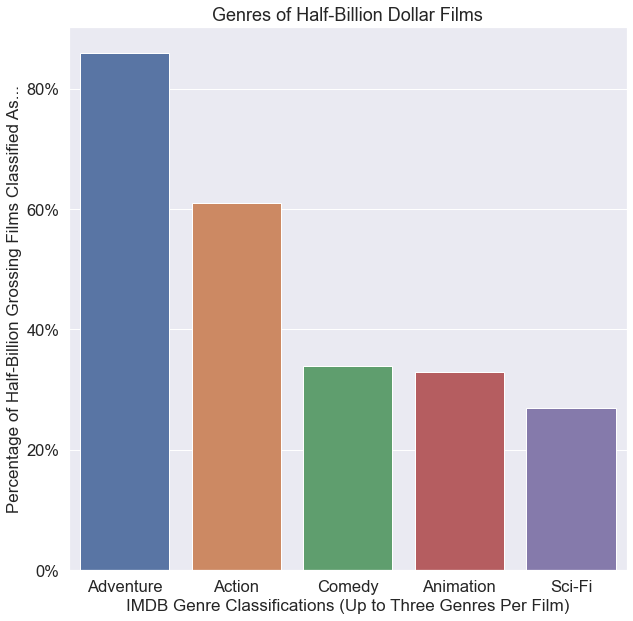

In [83]:
half_billion_counts_percent = half_billion_counts.copy()
genres, percent = half_billion_counts_percent.columns

half_billion_counts_percent[percent] = half_billion_counts_percent[percent]/len(half_billion)

plt.figure(figsize=(10, 10))
sns.set(font_scale = 1.5)

xlabel = 'IMDB Genre Classifications (Up to Three Genres Per Film)'
ylabel = 'Percentage of Half-Billion Grossing Films Classified As...'
graphic_title = 'Genres of Half-Billion Dollar Films'
#half_billion_counts_percent.rename(columns = {oldxlabel:xlabel,oldylabel:ylabel},inplace=True)
q1_ax = sns.barplot(y=percent,x=genres, data=half_billion_counts_percent.head())

#Fortmatting
q1_ax.set_xlabel(xlabel, fontsize = 17)
q1_ax.set_ylabel(ylabel, fontsize = 17)
q1_ax.set(title=graphic_title)
current_values = q1_ax.get_yticks()
# using format string '{:.0f}' here but you can choose others
q1_ax.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);


On to question 2:
2. What is the best month to release a film in to generate the most revenue?

This question requires far less analysis. I'd like to look at it in two different ways. The first will be a histogram to see what months the half-billion grossing movies were released in. The second is a simple average of worldwide gross of all the films in the dataset binned by month.

Graphic #2

In [84]:
def release_month_count(df,div,sig):
    rt = df.groupby('tn_release_month')['tn_num_month','tn_domestic_gross','tn_foreign_gross','tn_worldwide_gross'].mean()
    
    #I need these values for the next chart.
    rt['count'] = df.groupby('tn_release_month')['title'].count()
    rt['count_percent'] = (rt['count']/len(df)).round(decimals=sig+2)
    #Lets reduce the significant digits to make the graph more readable.
    #We'll go with millions of dollars.
    
    cols = ['tn_domestic_gross','tn_foreign_gross','tn_worldwide_gross']

    rt[cols[0:3]] = ((rt[cols[0:3]]/div).round()).astype(int)
    rt.sort_values('tn_num_month',inplace=True)
    rt.reset_index(inplace=True)
    rt.drop(columns='tn_num_month',inplace=True)
    return rt
binned_by_month = release_month_count(dataset,1000000,1).iloc[:,0:4]
binned_by_month

<ipython-input-84-ac2877dd6f3a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rt = df.groupby('tn_release_month')['tn_num_month','tn_domestic_gross','tn_foreign_gross','tn_worldwide_gross'].mean()


,tn_release_month,tn_domestic_gross,tn_foreign_gross,tn_worldwide_gross
0,Jan,42,47,89
1,Feb,73,89,162
2,Mar,65,89,155
3,Apr,64,108,172
4,May,101,174,275
5,Jun,115,177,292
6,Jul,89,150,239
7,Aug,51,58,109
8,Sep,39,48,87
9,Oct,36,57,92


This shows that the biggest money makers of the year are released in the summer months of May, June and July.

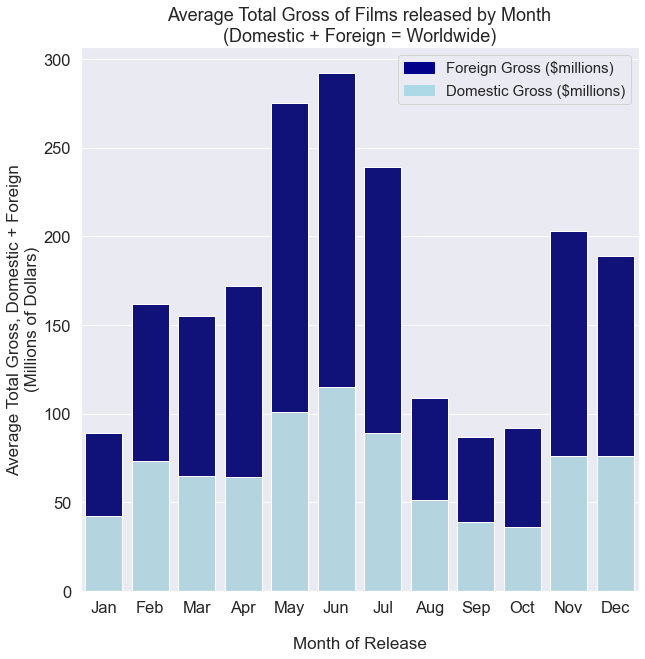

In [85]:
#Now for the graphic

mon, dom, fgn, wor = binned_by_month.columns

title = "Average Total Gross of Films released by Month\n(Domestic + Foreign = Worldwide)"
xlabel = '\nMonth of Release'
ylabel = 'Average Total Gross, Domestic + Foreign\n(Millions of Dollars)'

# set the figure size
plt.figure(figsize=(10, 10))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = binned_by_month[[mon,wor]]

# bar chart 1 -> top bars (group of worldwide total)
q2_ax1 = sns.barplot(x=mon,  y=wor, data=total, color='darkblue')

# bottom bar ->  take only domestic values from the data
domestic = binned_by_month[[mon,dom,wor]]

# bar chart 2 -> bottom bars (group of domestic)
q2_ax2 = sns.barplot(x=mon, y=dom, data=domestic, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Foreign Gross ($millions)')
bottom_bar = mpatches.Patch(color='lightblue', label='Domestic Gross ($millions)')
plt.legend(handles=[top_bar, bottom_bar], fontsize = 15)
q2_ax1.set_xlabel(xlabel, fontsize = 17)
q2_ax1.set_ylabel(ylabel, fontsize = 17)
q2_ax1.set(title=title)

# show the graph
plt.show()

Graphic #3

In [86]:
#Now we're going to to show how many of our Half a billion films were released
#for each month of the year.
#Even though we've used all bar charts so far, this data should also be a 
#bar chart because it fits the data.

binned_by_month_half_billion = release_month_count(half_billion,1000000,0)[['tn_release_month','count_percent']]
binned_by_month_half_billion

<ipython-input-84-ac2877dd6f3a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rt = df.groupby('tn_release_month')['tn_num_month','tn_domestic_gross','tn_foreign_gross','tn_worldwide_gross'].mean()


,tn_release_month,count_percent
0,Jan,0.01
1,Feb,0.03
2,Mar,0.08
3,Apr,0.05
4,May,0.13
5,Jun,0.20
6,Jul,0.15
7,Aug,0.03
8,Sep,0.01
9,Oct,0.03


<ipython-input-87-2954234a437f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  q2_ax2.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);


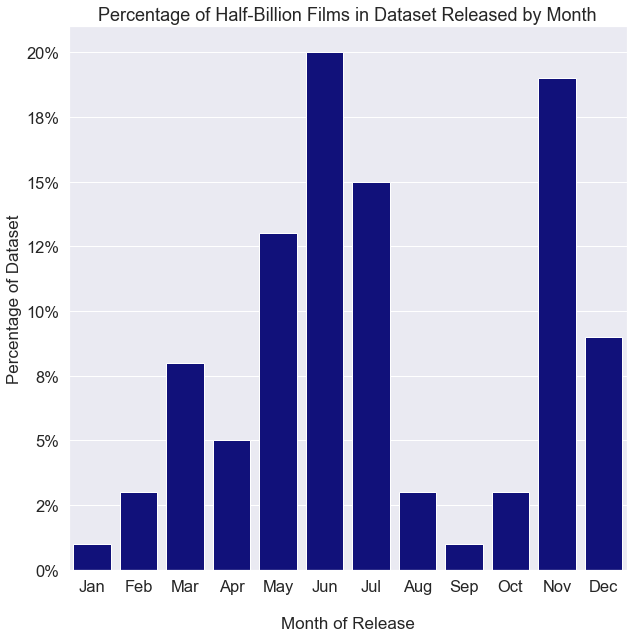

In [87]:
mon, per = binned_by_month_half_billion.columns

title = "Percentage of Half-Billion Films in Dataset Released by Month"
xlabel = '\nMonth of Release'
ylabel = 'Percentage of Dataset'

# set the figure size
plt.figure(figsize=(10, 10))

# bar chart 1 -> top bars (group of worldwide total)
q2_ax2 = sns.barplot(x=mon,  y=per, data=binned_by_month_half_billion, color='darkblue')

q2_ax2.set_xlabel(xlabel, fontsize = 17)
q2_ax2.set_ylabel(ylabel, fontsize = 17)
q2_ax2.set(title=title)
current_values = q2_ax2.get_yticks()
# using format string '{:.0f}' here but you can choose others
q2_ax2.set_yticklabels(['{:,.0%}'.format(x) for x in current_values]);

# show the graph
plt.show();

Question #3

3. What writers, directors, producers, actors and actresses have the highest revenue earning potential?

To answer this question, once again, we need to answer it two ways. The first is which category is most consistent, writer, director, producer or actor. Then, once we do that, we can list the top ten mone making talent in each category.

In [88]:
#The writers job has a lot of bad information in it. It contains people who 
#get credit for creating characters that are featured in the mega popular
#superhero films, but the character creaters didn't write the movie at all.
#Unfortunatley, there's no way to isolate the screenwriters, so instead we'll 
#just take people who have at least three films on their resume. Hopefully this
#won't be a problem with the other jobs.

#So, we'll add a column then to use the count to filter the data. We may as
#well do this for all of them.

def counting_films(df):
    new = df.groupby('person_id')['movie_id','primary_name'].count()
    new.rename(columns = {'movie_id' :'film_count'}, inplace=True)
    df = pd.merge(df,new['film_count'], how='inner',left_on='person_id', right_on='person_id')
    return df

writers = counting_films(writers)
directors = counting_films(directors)
producers = counting_films(producers)
actors = counting_films(actors)
actresses = counting_films(actresses)
actorsneutral = counting_films(actorsneutral)

<ipython-input-88-fd1aff0fe6e2>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new = df.groupby('person_id')['movie_id','primary_name'].count()


In [89]:
#Earlier, I grouped together all the different categories in their own
#dataframe. Now we just need to add the film grossing information to that data.

def add_movie_stats(org,cls,div):
    new = pd.merge(org,dataset[cls+['movie_id']], how='inner',left_on='movie_id', right_on='movie_id')
    new[cls] = (new[cls]/div).round(0)
    return new
    
cols = ['tn_worldwide_gross']
divisor = 1000000
writers = add_movie_stats(writers,cols,divisor)
directors = add_movie_stats(directors,cols,divisor)
producers = add_movie_stats(producers,cols,divisor)
actors  = add_movie_stats(actors,cols,divisor)
actresses = add_movie_stats(actresses,cols,divisor)
actorsneutral = add_movie_stats(actorsneutral,cols,divisor)

In [90]:
#We can't hire dead people, so let's get rid of them
writers_alive = writers[writers['death_year'].isna()]
directors_alive = directors[directors['death_year'].isna()]
producers_alive = producers[producers['death_year'].isna()]
actors_alive = actors[actors['death_year'].isna()]
actresses_alive = actresses[actresses['death_year'].isna()]
actorsneutral_alive = actorsneutral[actorsneutral['death_year'].isna()]




In [91]:
#Now I need to see how the top creatives averages differ.
def top(df,floor,num,label):
    new = df[df['film_count'].map(lambda x : True if x>=floor else False)]
    tops = new.groupby('primary_name')[['tn_worldwide_gross']].mean().sort_values('tn_worldwide_gross',ascending=False).head(num)
    tops['tn_worldwide_gross'] = tops['tn_worldwide_gross'].round(0).astype(int)
    last = pd.merge(tops,df[['primary_name','film_count']], how='left',left_on='primary_name', right_on='primary_name')
    last.rename(columns={'primary_name':label+"'s name",'tn_worldwide_gross' : label+"'s Gross",'film_count':label+"'s film credits"},inplace=True)
    last = last[~last.duplicated()].reset_index(drop=True)
    return last.reset_index()

the_floor = 3
the_top = 50

writers_top = top(writers_alive,the_floor,the_top,'Writer')
directors_top = top(directors_alive,the_floor,the_top,'Director')
producers_top = top(producers_alive,the_floor,the_top,'Producer')
actors_top = top(actors_alive,the_floor,the_top,'Actor')
actresses_top = top(actresses_alive,the_floor,the_top,'Actress')
actorsneutral_top = top(actorsneutral_alive,the_floor,the_top,'(Gender Inclusive) Actor')

In [92]:
#Putting all the averages together
def merging(df1,df2):
    tem = pd.merge(df1,df2,how='inner',left_on='index',right_on='index')
    return tem

temp1 = merging(writers_top,directors_top)
temp2 = merging(producers_top,actors_top)
temp3 = merging(actresses_top,actorsneutral_top)
temp4 = merging(temp1,temp2)
all_creatives = merging(temp4,temp3)
des_rows = ["Writer's Gross","Director's Gross","Producer's Gross","Actor's Gross","Actress's Gross","(Gender Inclusive) Actor's Gross"]
all_creatives_average = pd.DataFrame(all_creatives[des_rows].mean().round(0).astype(int))
all_creatives_average.reset_index(inplace=True)
all_creatives_average.rename(columns={'index':'Creative Jobs',0:"Top "+str(the_top)+" Average gross ($MM)"},inplace=True)
all_creatives_average

,Creative Jobs,Top 50 Average gross ($MM)
0,Writer's Gross,603
1,Director's Gross,403
2,Producer's Gross,388
3,Actor's Gross,484
4,Actress's Gross,306
5,(Gender Inclusive) Actor's Gross,513


<ipython-input-93-9d2398498ceb>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  q3_ax.set_yticklabels(['${:.0f}m'.format(x) for x in current_values]);


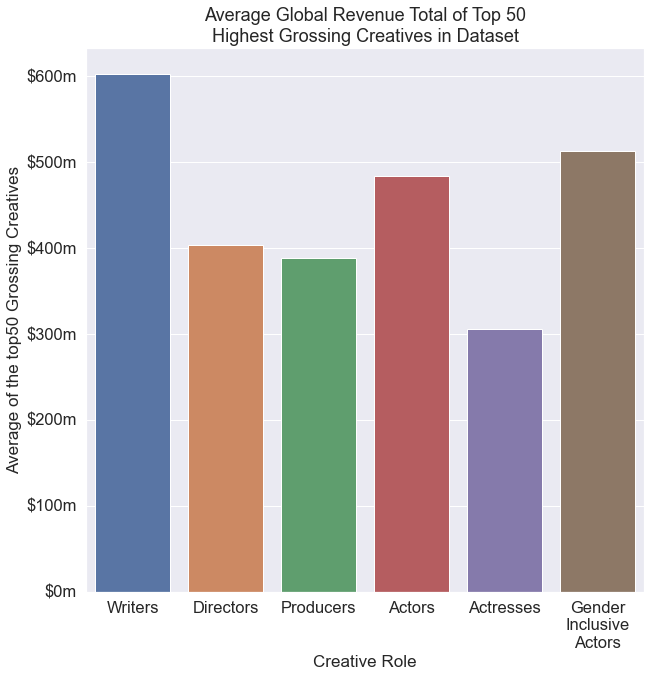

In [93]:
#Now for the graphic
job, grs = all_creatives_average.columns
abb_rows = ['Writers','Directors','Producers','Actors','Actresses','Gender\nInclusive\nActors']
creatives_gross_graphic = all_creatives_average.copy()
row_change = {}
for i in range(len(des_rows)):
    row_change[des_rows[i]]=abb_rows[i]
creatives_gross_graphic['Creative Jobs'] = creatives_gross_graphic['Creative Jobs'].map(lambda x: row_change[x])

plt.figure(figsize=(10, 10))
sns.set(font_scale = 1.5)

xlabel = "Creative Role"
ylabel = "Average of the top" +str(the_top)+" Grossing Creatives"
title = "Average Global Revenue Total of Top " +str(the_top)+"\nHighest Grossing Creatives in Dataset"
#half_billion_counts_percent.rename(columns = {oldxlabel:xlabel,oldylabel:ylabel},inplace=True)
q3_ax = sns.barplot(y=grs,x=job, data=creatives_gross_graphic)

#Fortmatting
q3_ax.set_xlabel(xlabel, fontsize = 17)
q3_ax.set_ylabel(ylabel, fontsize = 17)
q3_ax.set(title=title)
current_values = q3_ax.get_yticks()
current_values[:]=current_values[:]
#using format string '{:.0f}' here but you can choose others
q3_ax.set_yticklabels(['${:.0f}m'.format(x) for x in current_values]);

In [94]:
#According to the data, writers and actors have the largest impact on a films
#total gross. So we'd reccomend hiring some big names in those two categories.
#Despite the data, we highly reccomend pay equality between actors and 
#actresses. We cannot make popular movies without actresses. We should pay them
#well. Also, if it gets out that your film studio does not have pay equality
#between men and women, the public will not be happy.

#Anyway, with this in mind, lets find the top ten highest grossing creatives
#in the categories of Writers, Actors and Actresses.

all_creatives.rename(columns = {'index':'Rank'},inplace=True)
all_creatives['Rank'] = all_creatives['Rank'] +1
top_ten = all_creatives[["Rank","Writer's name","Actor's name","Actress's name"]].head(10)
top_ten

,Rank,Writer's name,Actor's name,Actress's name
0,1,Guillermo del Toro,Richard Armitage,Sandra Bullock
1,2,Christopher Markus,Ian McKellen,Bryce Dallas Howard
2,3,Stephen McFeely,Robert Downey Jr.,Evangeline Lilly
3,4,Derek Connolly,Chris Evans,Scarlett Johansson
4,5,David S. Goyer,Chris Pratt,Eloise Mumford
5,6,Chris McKenna,Chris Hemsworth,Anne Hathaway
6,7,Erik Sommers,Benjamin Bratt,Holly Hunter
7,8,Philippa Boyens,Andy Serkis,Judi Dench
8,9,Fran Walsh,Mark Ruffalo,Angelina Jolie
9,10,Suzanne Collins,Martin Freeman,Emily Mortimer


And that's a wrap. I've got everything I need to create my slides now.